<a href="https://colab.research.google.com/github/ankkod/nlp_capstone_project/blob/master/Autoticket_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Setting the current working directory
import os; os.chdir('/content/drive/My Drive/Capstone Project')

# Installing necessary packages and import libraries

In [ ]:
!pip install contractions

In [ ]:
!pip install ftfy

In [ ]:
!pip install langdetect

#### Importing Essential libraries

In [ ]:
import pandas as pd
import numpy as np
import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import pandas.util.testing as tm
%matplotlib inline
import missingno as msno
import sys
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords 
from collections import Counter
import string
import math
import contractions as cont_lib
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from ftfy import *
import sys
sys.path.append(os.path.join(os.path.dirname('/content/drive/My Drive/capstone'), ".."))
from python_utils import *

# Exploratory Data Analysis (EDA) and Visualization

In [ ]:
# Loading  the dataset
ticket_df=pd.read_csv('/content/drive/My Drive/Capstone Project/Data/input_data.csv')

In [ ]:
ticket_df.head()

,Short_description,Description,Caller,Assignment_group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [ ]:
ticket_df.shape

(8500, 4)

In [ ]:
ticket_df.head()

,Short_description,Description,Caller,Assignment_group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [ ]:
ticket_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short_description  8498 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment_group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


In [ ]:
ticket_df.describe()

,Short_description,Description,Caller,Assignment_group
count,8498,8499,8500,8500
unique,7482,7817,2950,74
top,password reset,the,bpctwhsn kzqsbmtp,GRP_0
freq,38,56,810,3976


***Entire Dataset visualization***

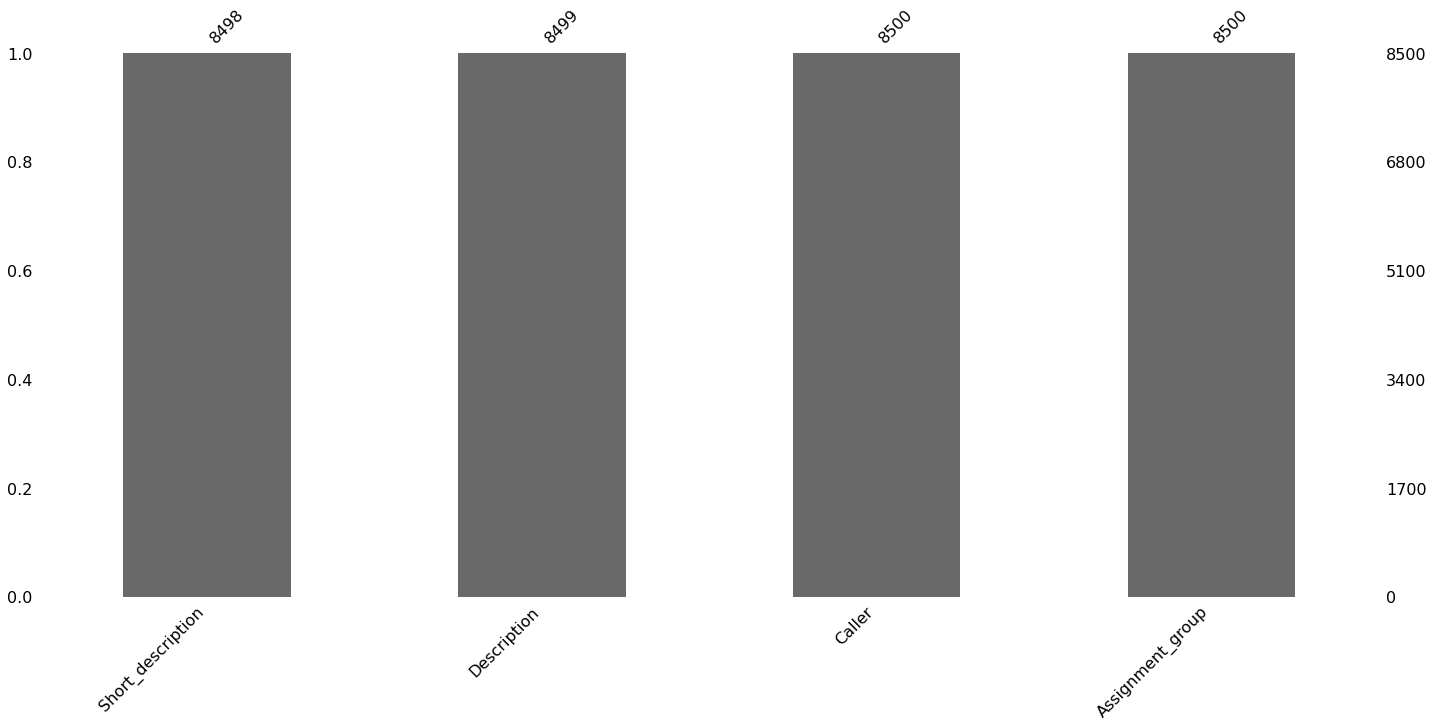

In [ ]:
msno.bar(ticket_df) #number of samples per column

### Checking for missing values

In [ ]:
ticket_df.isna().sum()

Short_description    2
Description          1
Caller               0
Assignment_group     0
dtype: int64

In [ ]:
ticket_df.isnull().sum()

Short_description    2
Description          1
Caller               0
Assignment_group     0
dtype: int64

In [ ]:
#Finding and Treating Missing Values 
# For Short Description
ticket_df[ticket_df['Short_description'].isnull()][['Short_description', 'Description']]

,Short_description,Description
2604,NaN,\r\n\r\nreceived from: ohdrnswl.rezuibdt@gmail...
3383,NaN,\r\n-connected to the user system using teamvi...


In [ ]:
# For Description
ticket_df[ticket_df['Description'].isnull()][['Short_description', 'Description']]

,Short_description,Description
4395,i am locked out of skype,NaN


In [ ]:
# Replacing Null values with values from adjacent columns -- combine desc n short desc where they are not replicas

ticket_df['Short_description'].fillna(ticket_df['Description'],inplace=True)
ticket_df['Description'].fillna(ticket_df['Short_description'],inplace=True)
ticket_df.isna().sum()

Short_description    0
Description          0
Caller               0
Assignment_group     0
dtype: int64

In [ ]:
ticket_df.iloc[[2604,3383,4395]]

,Short_description,Description,Caller,Assignment_group
2604,\r\n\r\nreceived from: ohdrnswl.rezuibdt@gmail...,\r\n\r\nreceived from: ohdrnswl.rezuibdt@gmail...,ohdrnswl rezuibdt,GRP_34
3383,\r\n-connected to the user system using teamvi...,\r\n-connected to the user system using teamvi...,qftpazns fxpnytmk,GRP_0
4395,i am locked out of skype,i am locked out of skype,viyglzfo ajtfzpkb,GRP_0


In [ ]:
## For Short Description after filling NA values
ticket_df[ticket_df['Short_description'].isnull()][['Short_description', 'Description']]

,Short_description,Description


In [ ]:
# For Description
ticket_df[ticket_df['Description'].isnull()][['Short_description', 'Description']]

,Short_description,Description


***Entire Dataset visualization after filling NaN values***

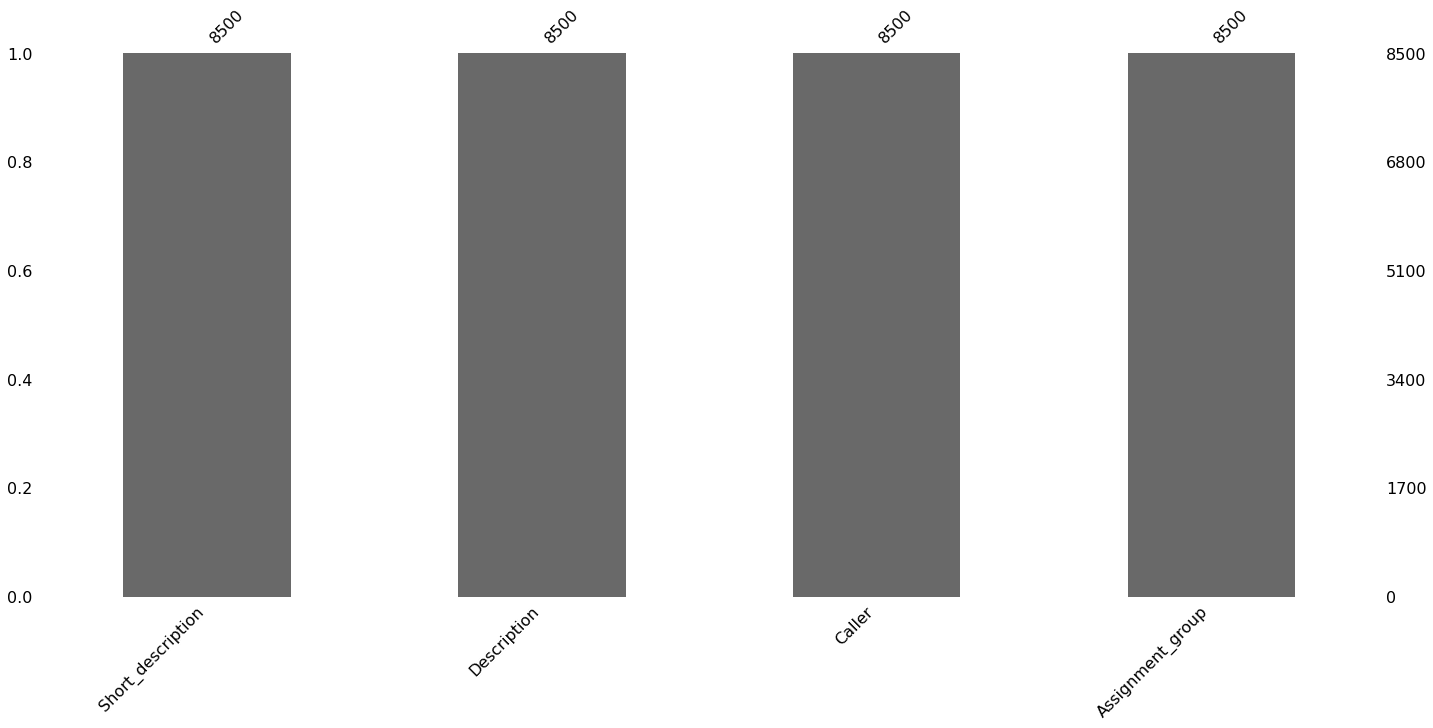

In [ ]:
msno.bar(ticket_df)

In [ ]:
ticket_df['Assignment_group'].unique()

array(['GRP_0', 'GRP_1', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7',
       'GRP_8', 'GRP_9', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_30', 'GRP_31',
       'GRP_33', 'GRP_34', 'GRP_35', 'GRP_36', 'GRP_37', 'GRP_38',
       'GRP_39', 'GRP_40', 'GRP_41', 'GRP_42', 'GRP_43', 'GRP_44',
       'GRP_45', 'GRP_46', 'GRP_47', 'GRP_48', 'GRP_49', 'GRP_50',
       'GRP_51', 'GRP_52', 'GRP_53', 'GRP_54', 'GRP_55', 'GRP_56',
       'GRP_57', 'GRP_58', 'GRP_59', 'GRP_60', 'GRP_61', 'GRP_32',
       'GRP_62', 'GRP_63', 'GRP_64', 'GRP_65', 'GRP_66', 'GRP_67',
       'GRP_68', 'GRP_69', 'GRP_70', 'GRP_71', 'GRP_72', 'GRP_73'],
      dtype=object)

In [ ]:
for index,text in enumerate(ticket_df['Assignment_group'][20:30]):
  print('Assignment_group %d:\n'%(index+1),text)

Assignment_group 1:
 GRP_0
Assignment_group 2:
 GRP_0
Assignment_group 3:
 GRP_0
Assignment_group 4:
 GRP_0
Assignment_group 5:
 GRP_0
Assignment_group 6:
 GRP_0
Assignment_group 7:
 GRP_0
Assignment_group 8:
 GRP_0
Assignment_group 9:
 GRP_0
Assignment_group 10:
 GRP_0


In [ ]:
ticket_df.head()

,Short_description,Description,Caller,Assignment_group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


***Exploratory Data Analysis (EDA) on Target class "Assignment Group"***

In [ ]:
ticket_df['Assignment_group'].value_counts()


GRP_0     3976
GRP_8      661
GRP_24     289
GRP_12     257
GRP_9      252
          ... 
GRP_64       1
GRP_61       1
GRP_67       1
GRP_70       1
GRP_73       1
Name: Assignment_group, Length: 74, dtype: int64

In [ ]:
ticket_df['Assignment_group'].describe

<bound method NDFrame.describe of 0        GRP_0
1        GRP_0
2        GRP_0
3        GRP_0
4        GRP_0
         ...  
8495    GRP_29
8496     GRP_0
8497     GRP_0
8498    GRP_62
8499    GRP_49
Name: Assignment_group, Length: 8500, dtype: object>

### Combine Desc and Short Desc columns

In [ ]:
ticket_df.head()

,Short_description,Description,Caller,Assignment_group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [ ]:
import math as m
def is_nan(input_value):
  try:
    return m.isnan(float(input_value))
  except:
    return False

def combine_text(s_desc, desc):
  out_string = ''
  if is_nan(s_desc):
    out_string = desc
  elif is_nan(desc):
    out_string = s_desc
  elif s_desc == desc:
    out_string = s_desc
  else:
    out_string = s_desc + " " + desc
  return out_string

ticket_df['Combined_Desc'] = ticket_df.apply(lambda x: combine_text(x['Short_description'],x["Description"]),axis=1)

In [ ]:
ticket_df.head()

,Short_description,Description,Caller,Assignment_group,Combined_Desc
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee# ...
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,outlook \r\n\r\nreceived from: hmjdrvpb.komuay...
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn \r\n\r\nreceived from: eylq...
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error


### Unbalanced class analysis

In [ ]:
df_top_19 = ticket_df['Assignment_group'].value_counts().nlargest(19).reset_index()
df_top_19

,index,Assignment_group
0,GRP_0,3976
1,GRP_8,661
2,GRP_24,289
3,GRP_12,257
4,GRP_9,252
5,GRP_2,241
6,GRP_19,215
7,GRP_3,200
8,GRP_6,184
9,GRP_13,145


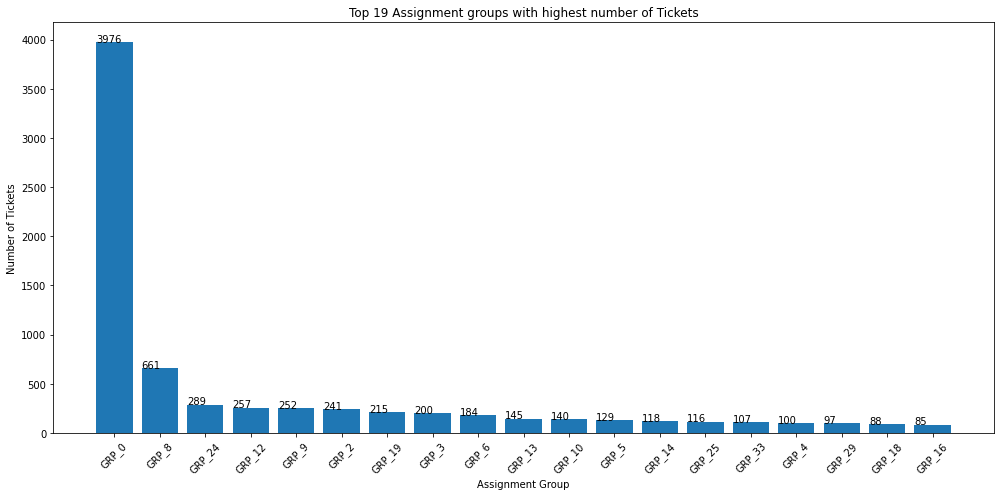

In [ ]:
plt.figure(figsize=(14,7))
bars = plt.bar(df_top_19['index'],df_top_19['Assignment_group'])
plt.title('Top 19 Assignment groups with highest number of Tickets')
plt.xlabel('Assignment Group')
plt.xticks(rotation=45)
plt.ylabel('Number of Tickets')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
plt.tight_layout()
plt.show()

In [ ]:
df_bottom_19 = ticket_df['Assignment_group'].value_counts().nsmallest(19).reset_index()
df_bottom_19

,index,Assignment_group
0,GRP_35,1
1,GRP_64,1
2,GRP_61,1
3,GRP_67,1
4,GRP_70,1
5,GRP_73,1
6,GRP_54,2
7,GRP_71,2
8,GRP_57,2
9,GRP_72,2


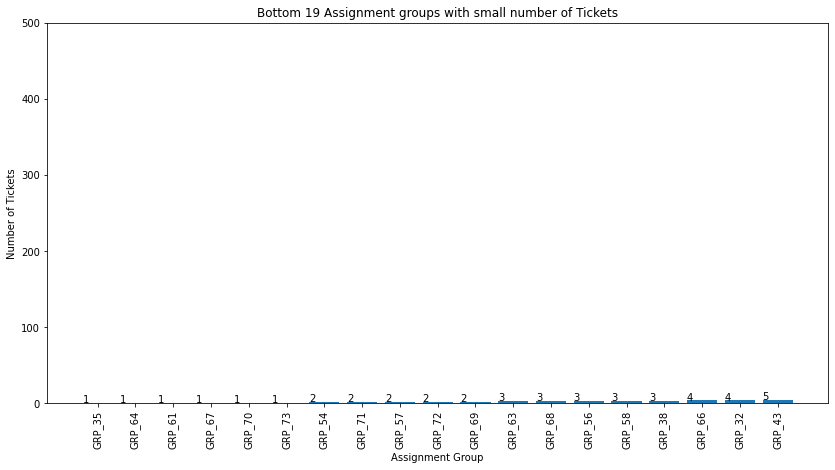

In [ ]:
plt.figure(figsize=(14,7))

bars = plt.bar(df_bottom_19['index'],df_bottom_19['Assignment_group'])
plt.title('Bottom 19 Assignment groups with small number of Tickets')
plt.xlabel('Assignment Group')
plt.xticks(rotation=90)
plt.ylim(0,500)
plt.ylabel('Number of Tickets')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)

plt.show()

Removing Groups with less than 15 samples

In [ ]:
sample = ticket_df.groupby(['Assignment_group'])
regroup=[]
for grp in ticket_df['Assignment_group'].unique():
  if(sample.get_group(grp).shape[0]<15):
    regroup.append(grp)
print('Found {} Assignment groups which have under 15 samples'.format(len(regroup)))
ticket_df['Assignment_group']= ticket_df['Assignment_group'].apply(lambda x : 'misc_grp' if x in regroup  else x)

# Validate Unique Assignment Groups 
ticket_df['Assignment_group'].unique()

Found 28 Assignment groups which have under 15 samples


array(['GRP_0', 'GRP_1', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7',
       'GRP_8', 'GRP_9', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_30', 'GRP_31',
       'GRP_33', 'GRP_34', 'misc_grp', 'GRP_36', 'GRP_37', 'GRP_39',
       'GRP_40', 'GRP_41', 'GRP_42', 'GRP_44', 'GRP_45', 'GRP_47',
       'GRP_48', 'GRP_60', 'GRP_62'], dtype=object)

In [ ]:
top_grp = ['GRP_0', 'GRP_1', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7',
       'GRP_8', 'GRP_9', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_30', 'GRP_31',
       'GRP_33', 'GRP_34', 'GRP_36', 'GRP_37', 'GRP_39',
       'GRP_40', 'GRP_41', 'GRP_42', 'GRP_44', 'GRP_45', 'GRP_47',
       'GRP_48', 'GRP_60', 'GRP_62']
ticket_df = ticket_df[ticket_df['Assignment_group'].isin(top_grp)].reset_index()

***Target Data Visualization***

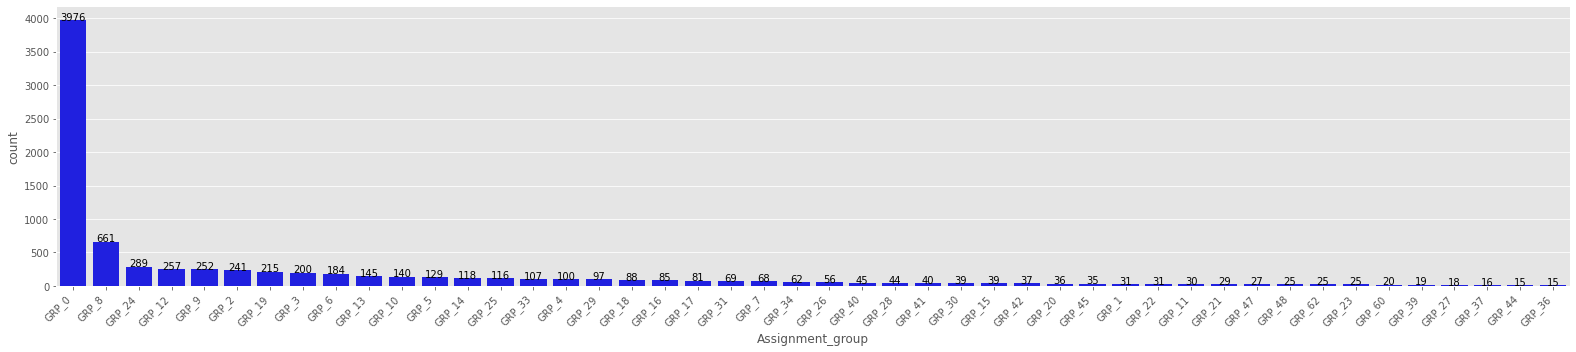

In [ ]:
## Data Pre-Processing and label Encoding on Target class "Assignment Group"
plt.style.use('ggplot')

desc_order = ticket_df['Assignment_group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
ax=sns.countplot(x='Assignment_group', data= ticket_df, color='blue',order= desc_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
i=0
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.1,
        ticket_df['Assignment_group'].value_counts()[i],ha="center")
    i += 1

plt.tight_layout()
plt.show()

### Ticket Description Languages Analysis

In [ ]:
import langdetect as ld

In [ ]:
#exec time = 1 min 
from langdetect import detect
    
def fn_lan_detect(df):                                        
   try:                                                          
      return detect(df)                                      
   except:                                                       
      return 'no'                                                  

ticket_df['language'] = ticket_df['Combined_Desc'].apply(fn_lan_detect)

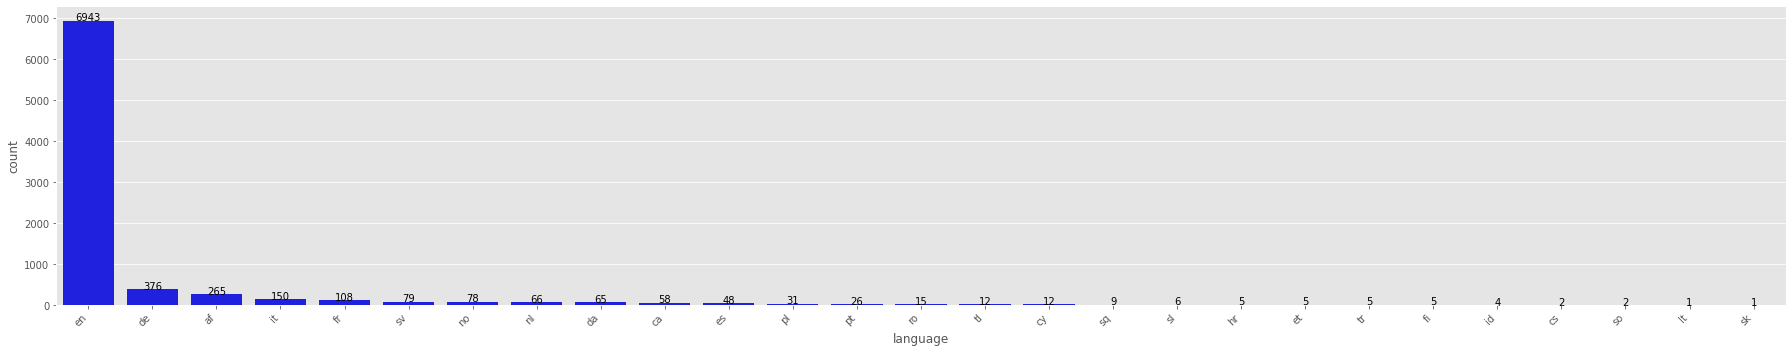

In [ ]:
plt.style.use('ggplot')

desc_order = ticket_df['language'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(25,5))
ax=sns.countplot(x='language', data= ticket_df, color='blue',order= desc_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
i=0
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.1,
        ticket_df['language'].value_counts()[i],ha="center")
    i += 1
plt.tight_layout()
plt.show()

***Data Pre-processing***

In [ ]:
callers = ticket_df['Caller'].unique()
callers.shape
ticket_df.drop(["Caller","Short_description","Description"],axis=1,inplace= True)
ticket_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8377 entries, 0 to 8376
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   index             8377 non-null   int64 
 1   Assignment_group  8377 non-null   object
 2   Combined_Desc     8377 non-null   object
 3   language          8377 non-null   object
dtypes: int64(1), object(3)
memory usage: 261.9+ KB


In [ ]:
ticket_df.head()

,index,Assignment_group,Combined_Desc,language
0,0,GRP_0,login issue -verified user details.(employee# ...,en
1,1,GRP_0,outlook \r\n\r\nreceived from: hmjdrvpb.komuay...,en
2,2,GRP_0,cant log in to vpn \r\n\r\nreceived from: eylq...,en
3,3,GRP_0,unable to access hr_tool page,en
4,4,GRP_0,skype error,no


#### Testing a few samples

In [ ]:
ld.detect(ticket_df.iloc[4395, 1])

'de'

In [ ]:
ld.detect("unable to open payslips")

'fr'

In [ ]:
ld.detect("skype error")

'no'

#### Translate using googletrans

In [ ]:
!pip install googletrans==3.1.0.a.0

     |████████████████████████████████| 61kB 5.5MB/s 
     |████████████████████████████████| 51kB 6.3MB/s 
     |████████████████████████████████| 1.0MB 22.7MB/s 
     |████████████████████████████████| 71kB 8.2MB/s 
     |████████████████████████████████| 61kB 7.0MB/s 
  Created wheel for googletrans: filename=googletrans-3.1.0a0-cp37-none-any.whl size=16368 sha256=352e83b627a10002b3434004ce46796e847683e795ca5aef685d494e7b2333eb
  Stored in directory: /root/.cache/pip/wheels/27/7a/a0/aff3babbb775549ce6813cb8fa7ff3c0848c4dc62c20f8fdac
Successfully built googletrans


In [ ]:
from googletrans import Translator, constants

In [ ]:
translator = Translator()

In [ ]:
translation = translator.translate("Hola Mundo") #testing

In [ ]:
print(translation.text)

Hello World


In [ ]:
df = pd.DataFrame({'Spanish':['piso','cama']})
df

,Spanish
0,piso
1,cama


In [ ]:
df['English'] = df['Spanish'].apply(translator.translate, dest='en').apply(getattr, args=('text',))
df

,Spanish,English
0,piso,flat
1,cama,bed


In [ ]:
#exec time = 50 min
ticket_df['Combined_Desc'] = ticket_df['Combined_Desc'].apply(translator.translate, dest='en').apply(getattr, args=('text',))

#### Saving dataframe after transalation into English language:

In [ ]:
#ticket_df.to_csv('ticket_data.csv')

In [ ]:
#ticket_df.to_csv('/content/drive/My Drive/Capstone Project/Data/ticket_data.csv')

In [ ]:
#Loading translated from existing CSV
#ticket_df = pd.read_csv('/content/drive/My Drive/Capstone Project/Data/ticket_data.csv')

In [ ]:
ticket_df.head()

,Unnamed: 0,index,Assignment_group,Combined_Desc,language
0,0,0,GRP_0,login issue -verified user details.(employee# ...,en
1,1,1,GRP_0,outlook \r\n\r\nreceived from: hmjdrvpb.komuay...,en
2,2,2,GRP_0,cant log in to vpn \r\n\r\nreceived from: eylq...,en
3,3,3,GRP_0,unable to access hr_tool page,en
4,4,4,GRP_0,skype error,no


In [ ]:
ticket_df.drop(["index"],axis=1,inplace= True)

In [ ]:
ticket_df.head()

,Unnamed: 0,Assignment_group,Combined_Desc,language
0,0,GRP_0,login issue -verified user details.(employee# ...,en
1,1,GRP_0,outlook \r\n\r\nreceived from: hmjdrvpb.komuay...,en
2,2,GRP_0,cant log in to vpn \r\n\r\nreceived from: eylq...,en
3,3,GRP_0,unable to access hr_tool page,en
4,4,GRP_0,skype error,no


In [ ]:
ticket_df.iloc[255,1] #checking a sample , to see if trnanslation has worked completely

'GRP_24'

In [ ]:
#exec time = 32 sec
#Function for Data Cleansing
from dateutil import parser
def is_valid_date(date_str):
    try:
        parser.parse(date_str)
        return True
    except:
        return False

def clean_data(text):
    text=text.lower()
    text = ' '.join([w for w in text.split() if not is_valid_date(w)])
    text = re.sub(r"received from:",' ',text)
    text = re.sub(r"from:",' ',text)
    text = re.sub(r"to:",' ',text)
    text = re.sub(r"subject:",' ',text)
    text = re.sub(r"sent:",' ',text)
    text = re.sub(r"ic:",' ',text)
    text = re.sub(r"cc:",' ',text)
    text = re.sub(r"bcc:",' ',text)
    #Remove email info 
    text = re.sub(r'\S*@\S*\s?', '', text)
    # Remove numberic details
    text = re.sub(r'\d+','' ,text)
    # Remove Non Dictionary character
    # Remove new line characters 
    text = re.sub(r'\n',' ',text)
    # Remove hashtag '#' while keeping hashtag text
    text = re.sub(r'#','', text)
    #& 
    text = re.sub(r'&;?', 'and',text)
    # Remove HTML special characters (e.g. &amp;)
    text = re.sub(r'\&\w*;', '', text)
    # Remove hyperlinks
    text = re.sub(r'https?:\/\/.*\/\w*', '', text)  
    # Remove characters beyond Readable formart by Unicode:
    text= ''.join(c for c in text if c <= '\uFFFF') 
    text = text.strip()
    # Remove unusable characters 
    text = ' '.join(re.sub("[^\u0030-\u0039\u0041-\u005a\u0061-\u007a]", " ", text).split())
    for name in callers:
      namelist = [part for part in name.split()]
      for namepart in namelist: 
          text = text.replace(namepart,'')
          
    text = re.sub(r"\s+[a-zA-Z]\s+", ' ', text)
    text = re.sub(' +', ' ', text)
    text = text.strip()
    return text
  
ticket_df['Combined_Desc'] = ticket_df['Combined_Desc'].apply(clean_data)

In [ ]:
ticket_df['length']=[len(text) for text in ticket_df['Combined_Desc']]
ticket_df = ticket_df[ticket_df['length'] >=3]
ticket_df ['Combined_Desc'] = ticket_df['Combined_Desc'].apply(lambda x: " " .join([word for word in x.split() if(len(word)>2)]))

In [ ]:
#further data processing - converting to lower case
ticket_df.reset_index(drop=True,inplace=True)

ticket_df['Combined_Desc'] = ticket_df['Combined_Desc'].str.strip()
ticket_df['Combined_Desc'] = ticket_df['Combined_Desc'].str.lower()

from collections import OrderedDict
ticket_df['Combined_Desc']= ticket_df['Combined_Desc'].str.split().apply(lambda x:OrderedDict.fromkeys(x).keys()).str.join(' ')
ticket_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8333 entries, 0 to 8332
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        8333 non-null   int64 
 1   Assignment_group  8333 non-null   object
 2   Combined_Desc     8333 non-null   object
 3   language          8333 non-null   object
 4   length            8333 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 325.6+ KB


In [ ]:
import nltk
nltk.download('stopwords')
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#Corpus creation
corpus=[]
new= ticket_df['Combined_Desc'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

### Top Stopwords Visualization

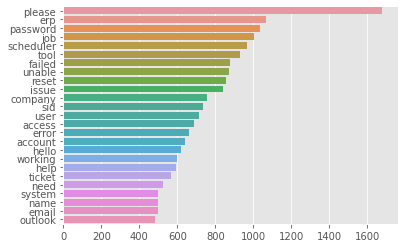

In [ ]:
# Word-level Text analysis
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

***Lemmatisation and stop words removal***

In [ ]:
# Remove Stopwords
from nltk.corpus import stopwords
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger') 

stwd = stopwords.words('english')
for i,text in enumerate(ticket_df['Combined_Desc']):
  ticket_df['Combined_Desc'][i]=" ".join(word for word in text.split(' ') if word not in stwd)



[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
# Install spacy for lemmatization to normalize the text data.
!pip install -q spacy 


In [ ]:
#exec time = 8 min
import spacy
nlp = spacy.load('en', disable=['parser', 'ner'])
allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']
def lemmatize_text(text):
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc])

ticket_df['Combined_Desc'] = ticket_df['Combined_Desc'].apply(lemmatize_text)

In [ ]:
ticket_df['Combined_Desc'][7912]

'hostname tool tax interface app total cpu since error threshold'

In [ ]:
# Import Gensim to showcase bigram model to cluster co-related data.
import gensim
import gensim.corpora as corpora
#Remove stemming and add lemmatistaion using simple_process from gensim 
from gensim.utils import simple_preprocess
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel

# Import spacy for lemmatization
import spacy


warnings.filterwarnings("ignore",category=DeprecationWarning)

In [ ]:
# Processing the simple_process gensim package to covert the input type as String.
merge_text= ticket_df.Combined_Desc.values.tolist()

In [ ]:
merge_text[5]

'unable log engineering tool skype'

In [ ]:
#Convert merge_text from each sentence to Words.
#Utilize simple_preprocess for Tokenization

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_phrase = list(sent_to_words(merge_text))

In [ ]:
print(data_phrase[5])

['unable', 'log', 'engineering', 'tool', 'skype']


***Ngram exploration***

In [ ]:
from nltk.util import ngrams
# Code Snippet for Top N-grams Barchart

def plot_top_ngrams_barchart(text, n):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

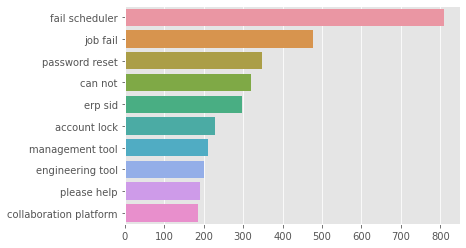

In [ ]:
plot_top_ngrams_barchart(ticket_df['Combined_Desc'],2)

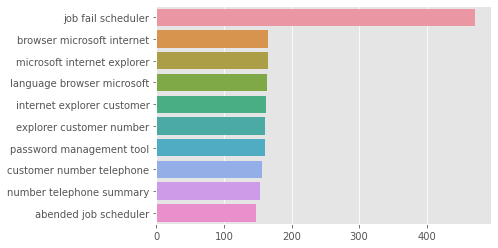

In [ ]:
plot_top_ngrams_barchart(ticket_df['Combined_Desc'],3)

In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_phrase, min_count=5, threshold=100) # high threshold
trigram = gensim.models.Phrases(bigram[data_phrase], threshold=100)  

#Sentence clubbing as a trigram/bigram model
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [ ]:
#Bigram Model
print(bigram_mod[data_phrase[5]])

['unable', 'log', 'engineering', 'tool', 'skype']


In [ ]:
#Trigram Model
print(trigram_mod[bigram_mod[data_phrase[5]]])

['unable', 'log', 'engineering', 'tool', 'skype']


In [ ]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [ ]:
# Design Bigrams
data_words_bigrams = make_bigrams(data_phrase)

In [ ]:
print(data_words_bigrams[5])

['unable', 'log', 'engineering', 'tool', 'skype']


***Word Cloud***

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
wordclouds=' '.join(map(str, data_words_bigrams))

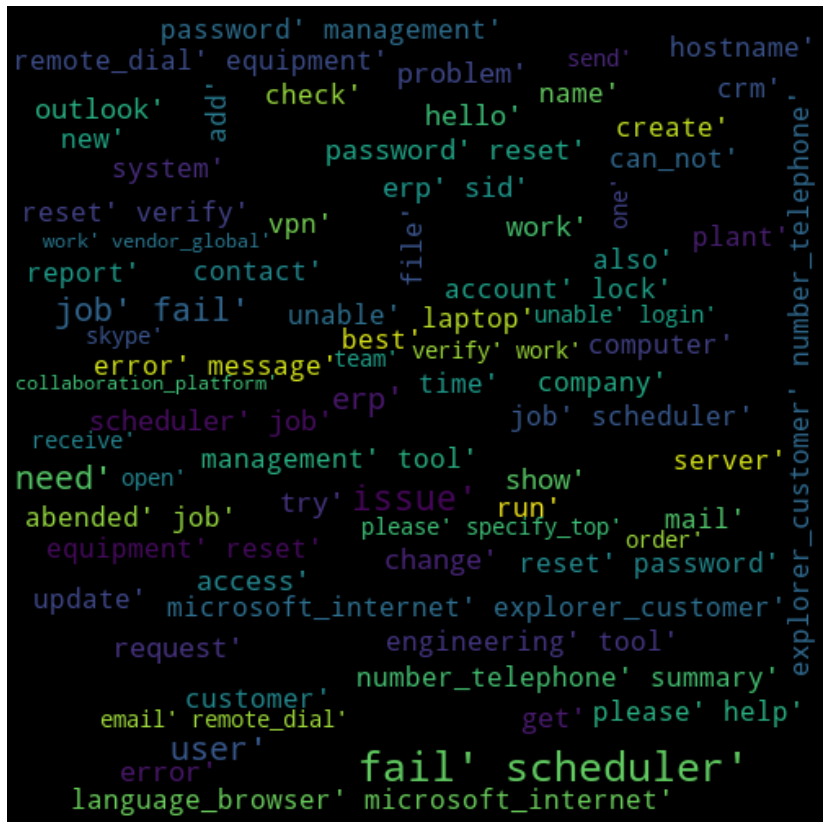

In [ ]:
wordcloud = WordCloud(width=500, height=500, max_font_size=25, min_font_size=12).generate(wordclouds)
plt.figure(figsize=(20,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()


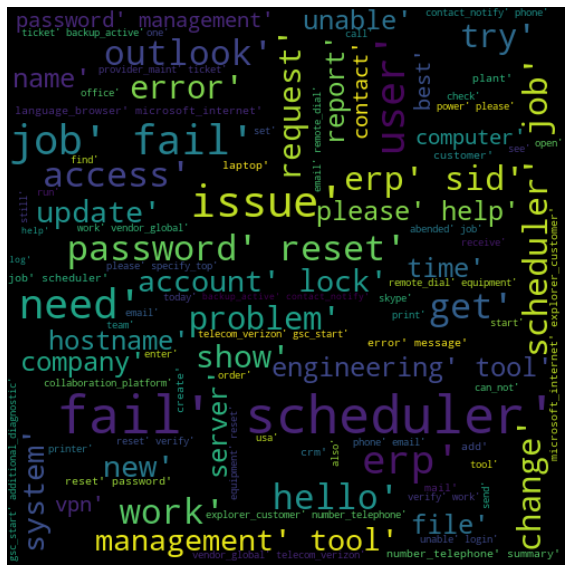

In [ ]:
#check for the word count 100)
wordcloud_2 = WordCloud(width=500, height=500, max_words=100).generate(wordclouds)
plt.figure(figsize=(10,15))
plt.imshow(wordcloud_2, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [ ]:
#Copy to new DataFrame for WordCloud creation on Target class "Assignment Group" 

newticket_df = ticket_df.copy()
newticket_df['words'] = data_words_bigrams
newticket_df

,Unnamed: 0,Assignment_group,Combined_Desc,language,length,words
0,0,GRP_0,login issue verify user detail employee manage...,en,204,"[login, issue, verify, user, detail, employee,..."
1,1,GRP_0,outlook hello team meeting skype etc appear ca...,en,142,"[outlook, hello, team, meeting, skype, etc, ap..."
2,2,GRP_0,can not log vpn can not good,en,47,"[can_not, log, vpn, can_not, good]"
3,3,GRP_0,unable access tool page,en,29,"[unable, access, tool, page]"
4,4,GRP_0,skype error,no,11,"[skype, error]"
...,...,...,...,...,...,...
8328,8372,GRP_3,tablet need reimage due multiple issue crm wif...,en,62,"[tablet, need, reimage, due, multiple, issue, ..."
8329,8373,GRP_29,email come mail good afternoon receiving send ...,en,113,"[email, come, mail, good_afternoon, receiving,..."
8330,8374,GRP_0,telephony software issue,en,24,"[telephony_software, issue]"
8331,8375,GRP_0,vip windows password reset tifpdchb pedxruyf,en,48,"[vip, windows, password, reset, tifpdchb, pedx..."


In [ ]:
#Sort target class Assignment group based on their frequent occurences

new_value = newticket_df['Assignment_group'].value_counts().sort_values(ascending=False).index
new_value

Index(['GRP_0', 'GRP_8', 'GRP_24', 'GRP_12', 'GRP_9', 'GRP_2', 'GRP_19',
       'GRP_3', 'GRP_6', 'GRP_13', 'GRP_10', 'GRP_5', 'GRP_14', 'GRP_25',
       'GRP_33', 'GRP_4', 'GRP_29', 'GRP_18', 'GRP_16', 'GRP_17', 'GRP_7',
       'GRP_31', 'GRP_34', 'GRP_26', 'GRP_40', 'GRP_28', 'GRP_41', 'GRP_15',
       'GRP_42', 'GRP_20', 'GRP_45', 'GRP_22', 'GRP_1', 'GRP_11', 'GRP_21',
       'GRP_47', 'GRP_62', 'GRP_23', 'GRP_60', 'GRP_30', 'GRP_39', 'GRP_27',
       'GRP_37', 'GRP_44', 'GRP_36', 'GRP_48'],
      dtype='object')

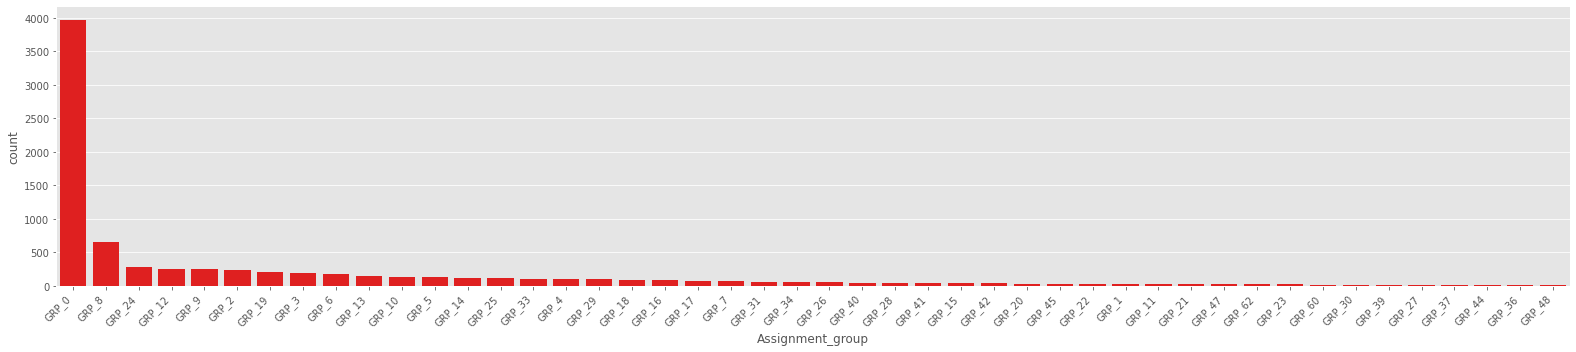

In [ ]:
plt.style.use('ggplot')
plt.subplots(figsize=(22,5))
ax=sns.countplot(x='Assignment_group', data= newticket_df, color='red',order= new_value )
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
#WordCloud Function

def wordcloud_grp(f, x):
    wordclouds_0=' '.join(map(str, f))

    wc = WordCloud(width=480, height=480, max_font_size=20, min_font_size=10, max_words=50).generate(wordclouds_0)
    plt.figure(figsize=(20,10))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title("Most common 50 words of {}".format(x))
    plt.margins(x=0, y=0)
    plt.show()

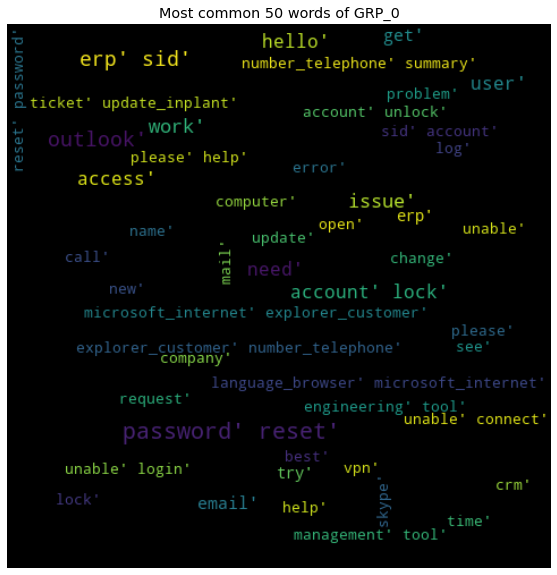

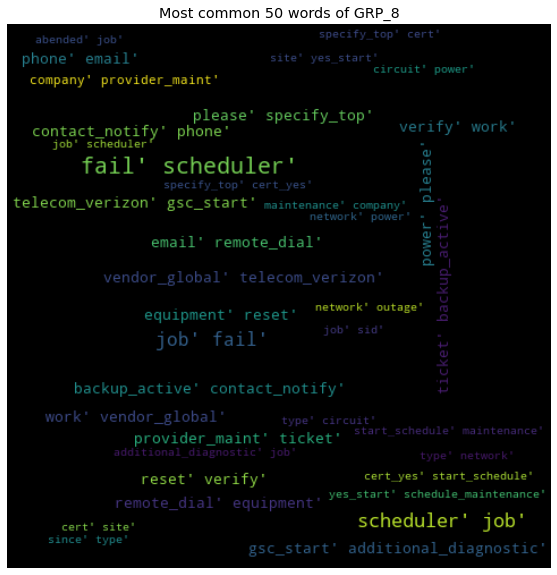

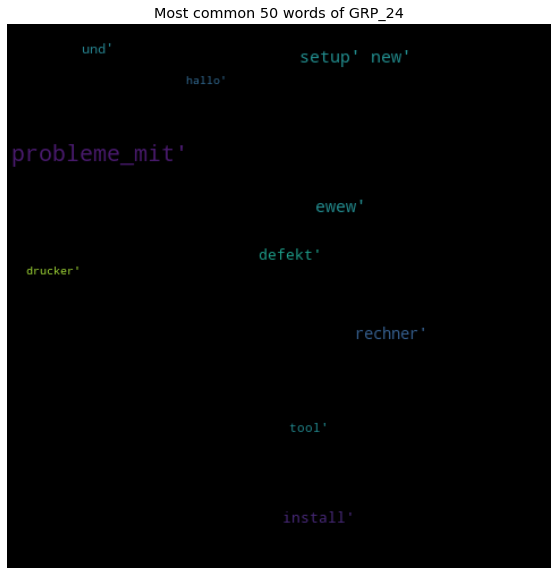

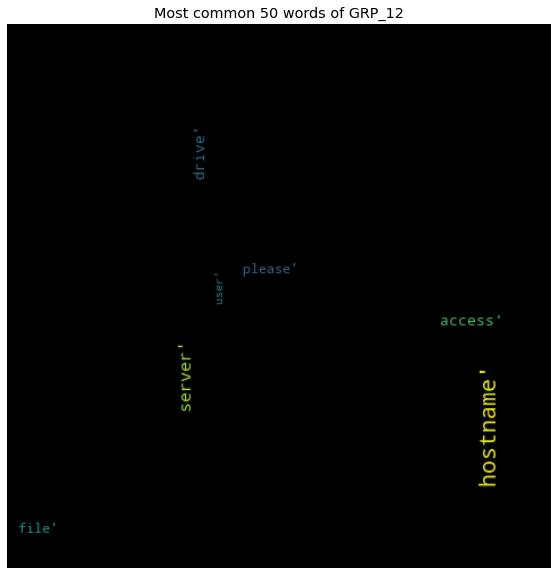

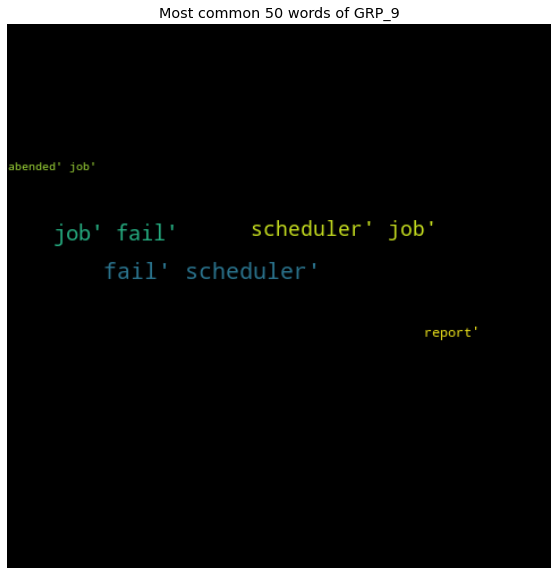

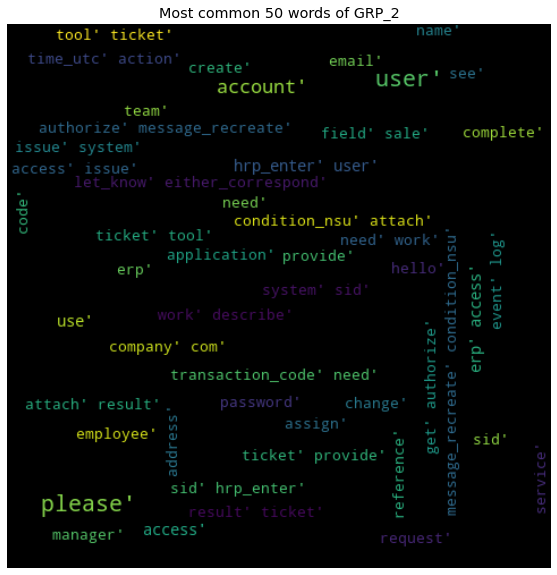

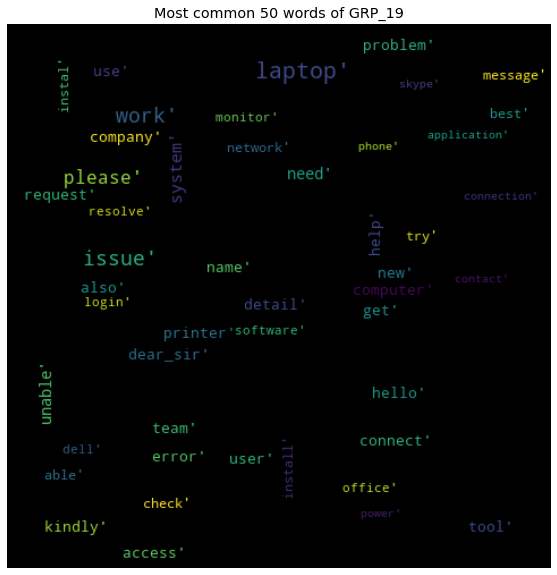

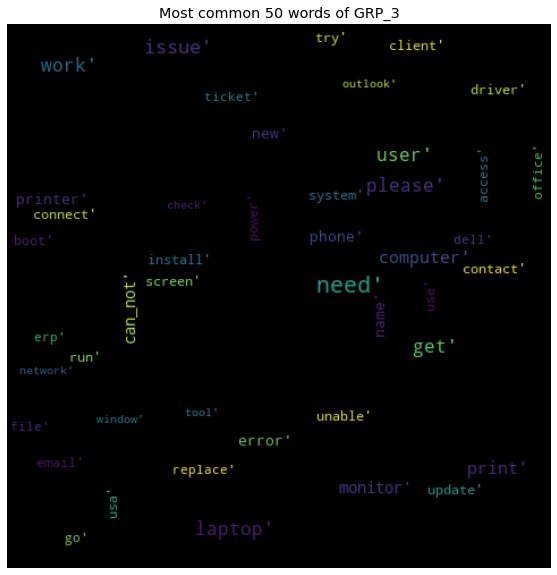

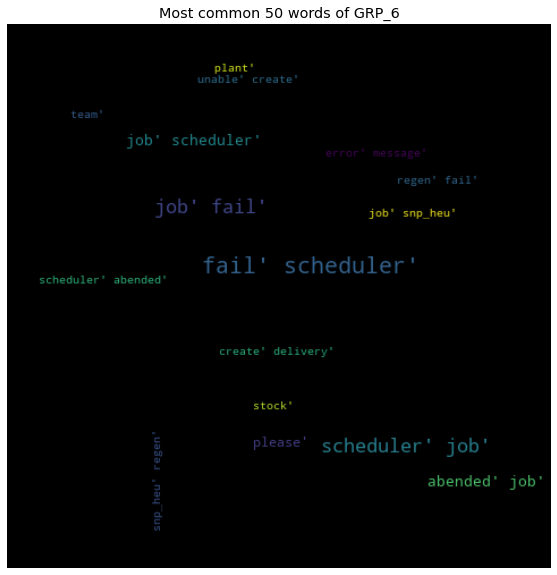

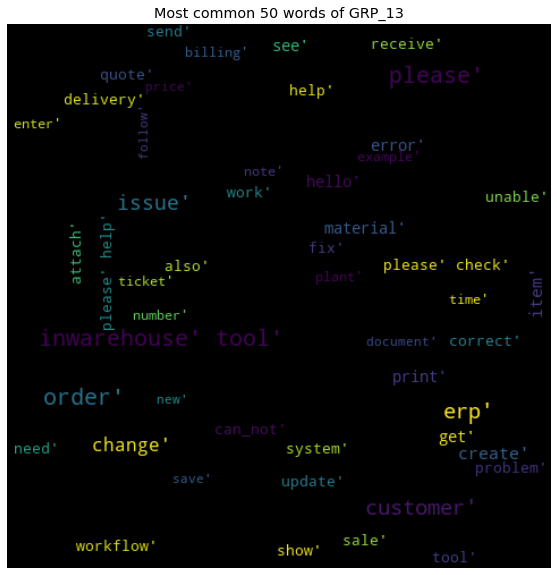

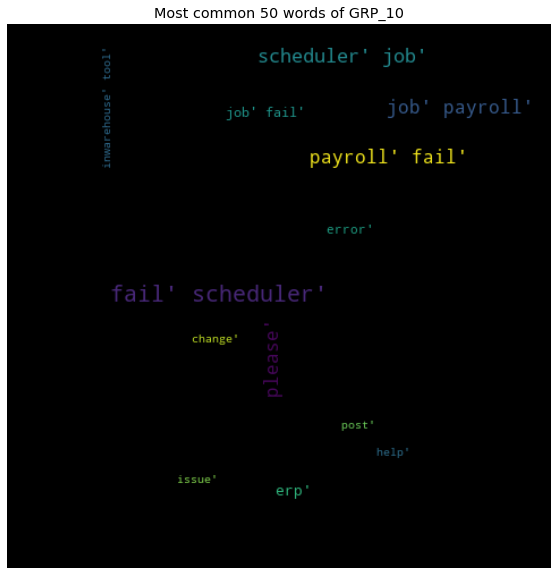

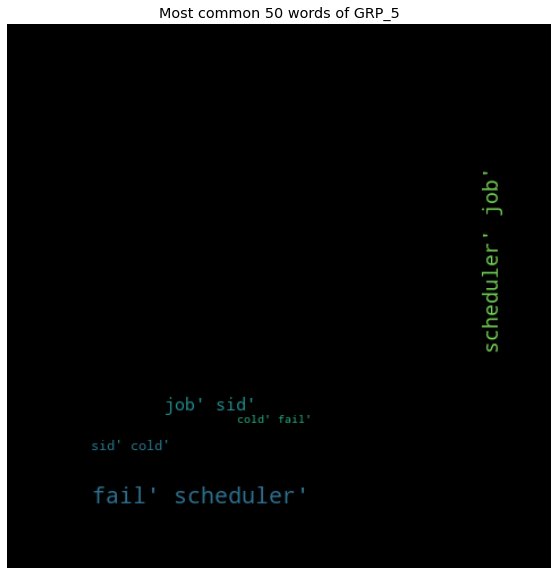

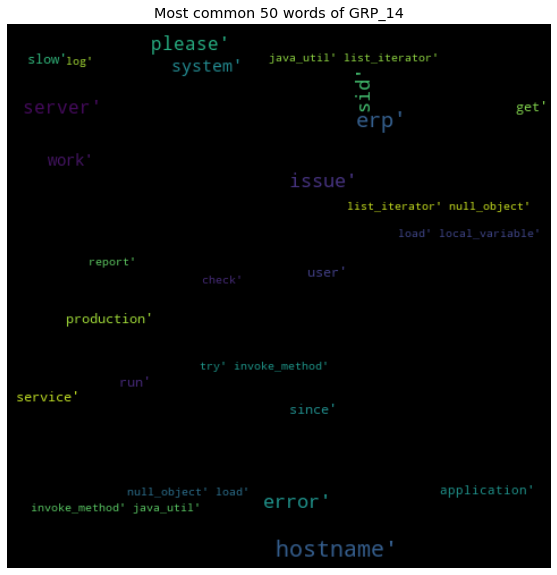

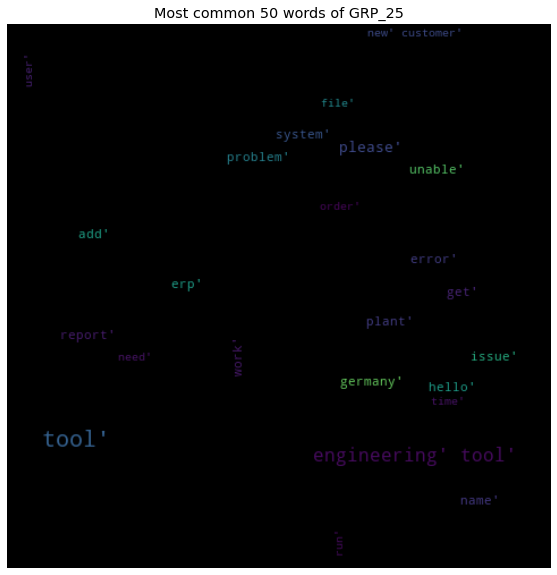

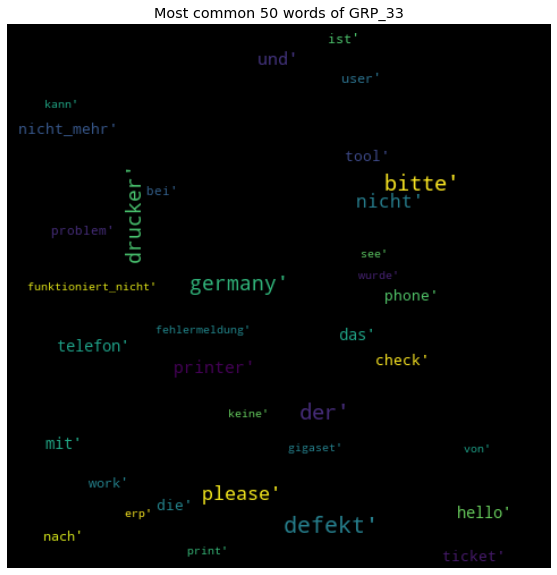

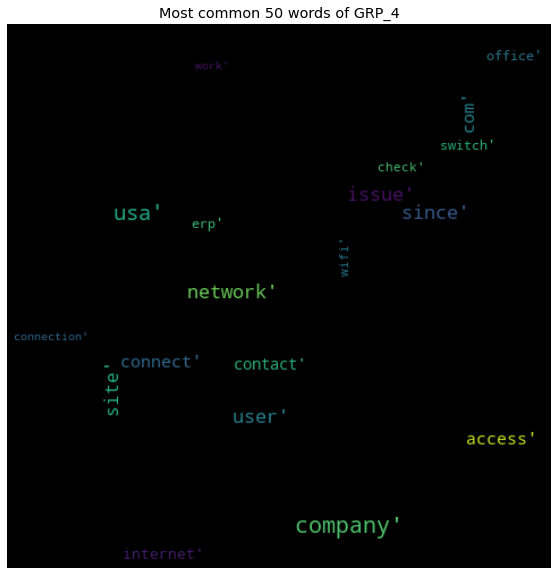

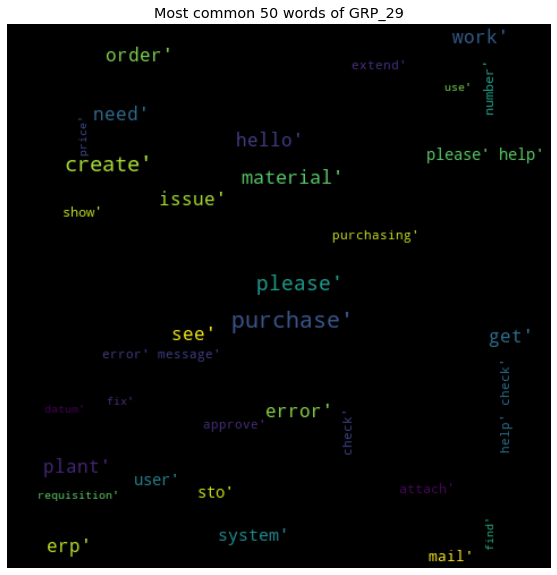

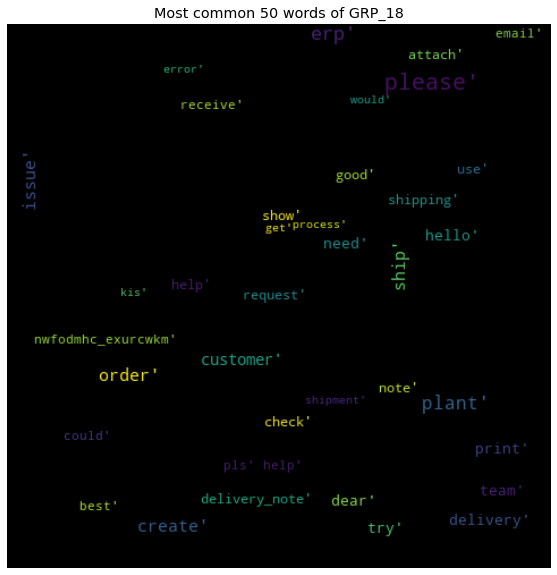

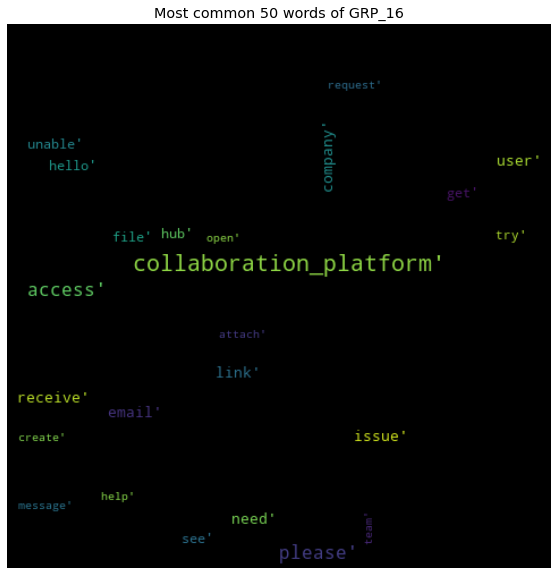

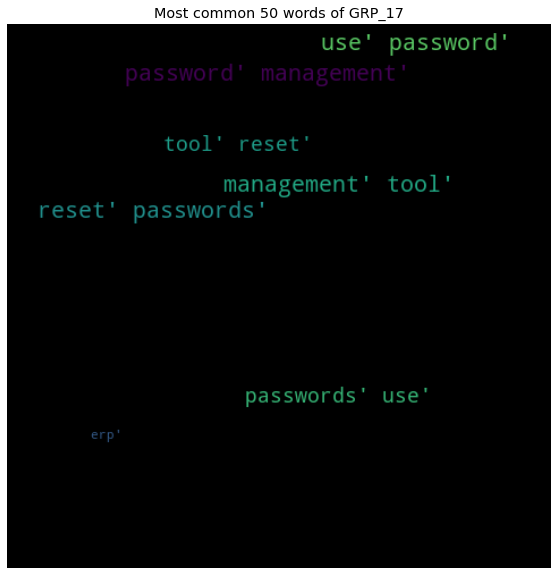

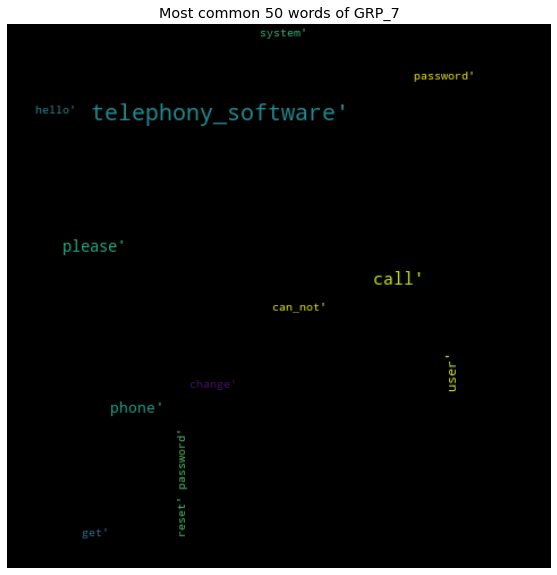

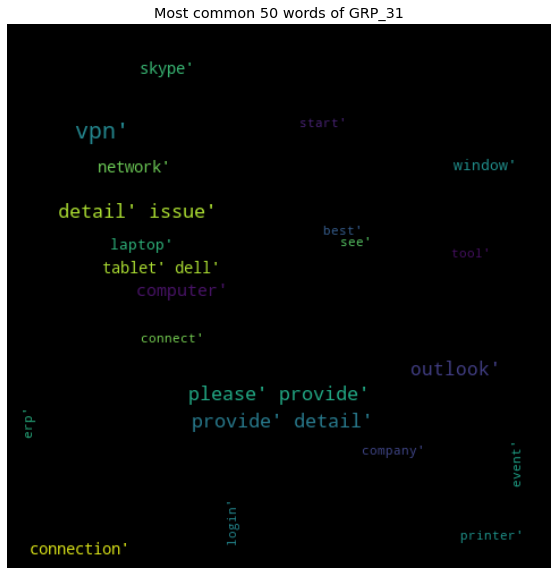

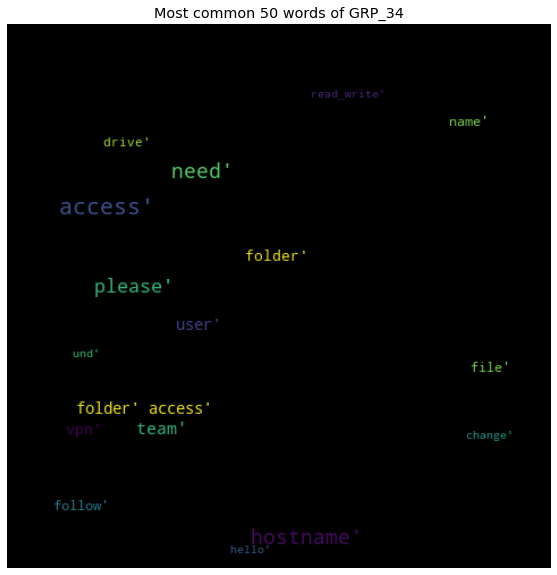

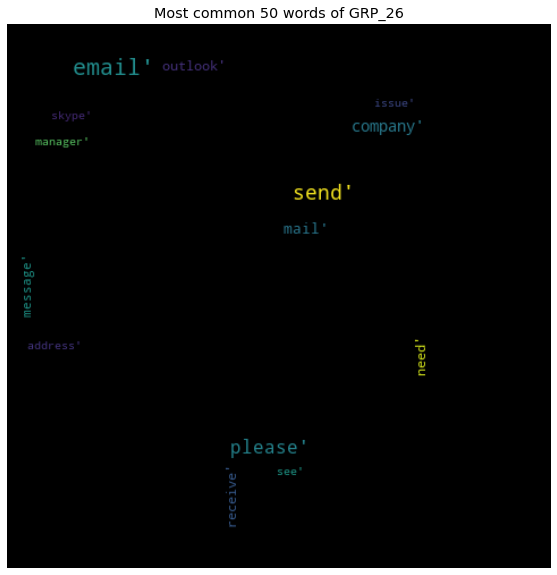

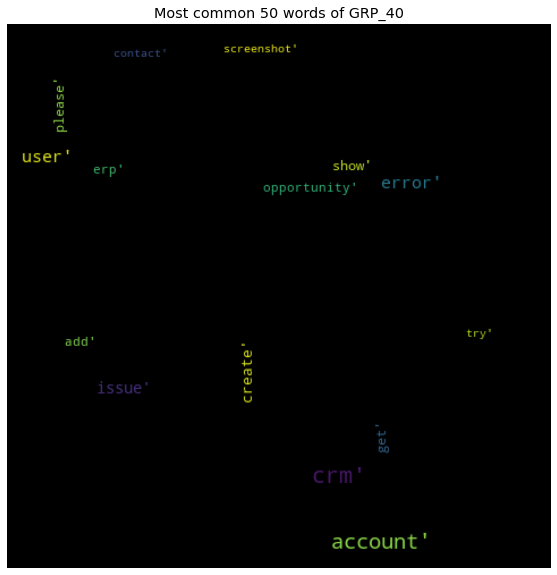

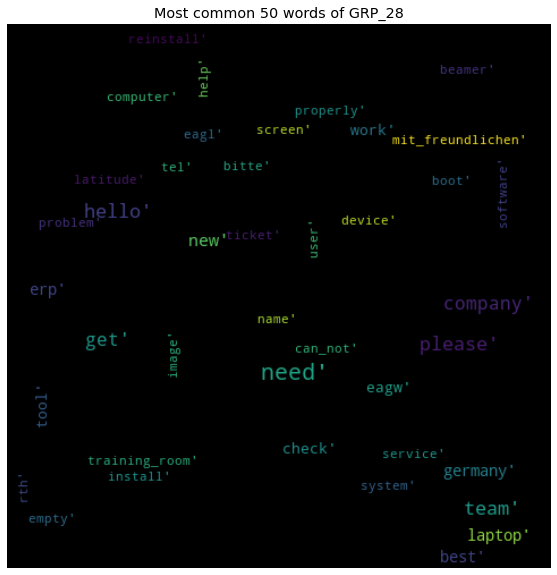

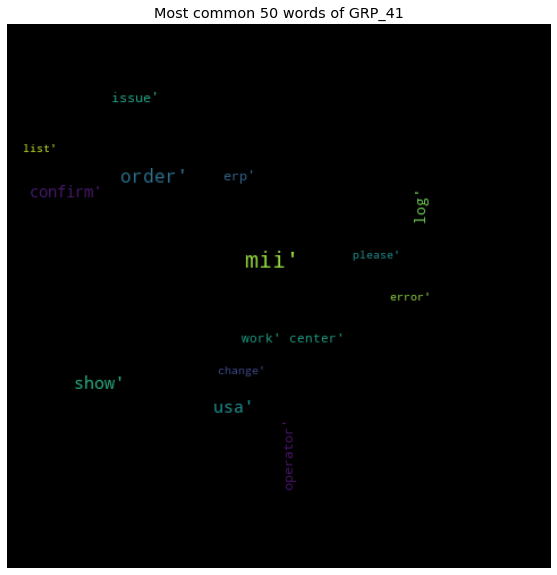

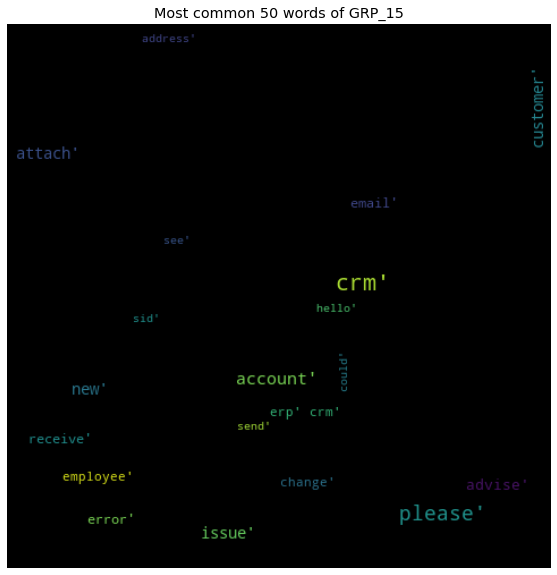

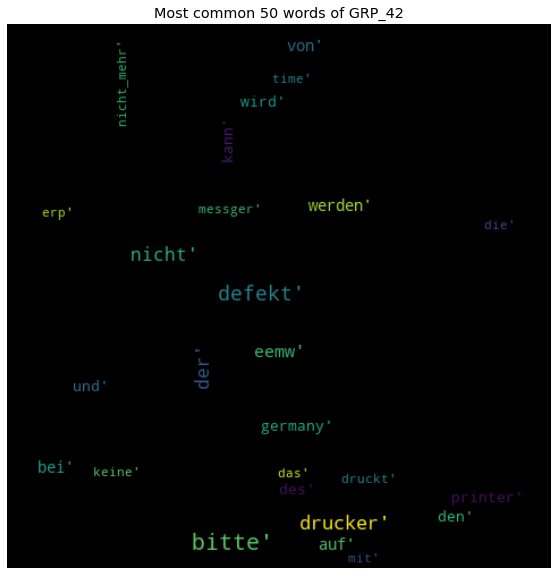

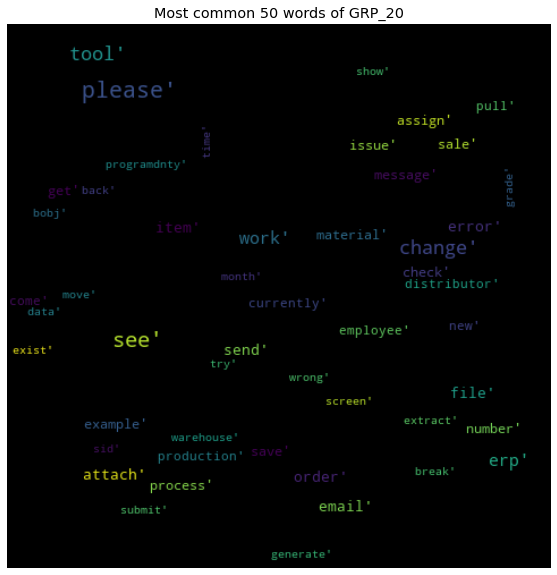

In [ ]:
#Looping the Top 30 Assignment groups

for i in range(30):

    Grp = newticket_df[newticket_df ['Assignment_group'] == new_value[i]]
    Grp = Grp['words']
    wordcloud_grp(Grp,new_value[i])

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
labelEnc = LabelEncoder()

In [ ]:
ticket_df["Grp_New"] = labelEnc.fit_transform(ticket_df["Assignment_group"])

In [ ]:
ticket_df

,Unnamed: 0,Assignment_group,Combined_Desc,language,length,Grp_New
0,0,GRP_0,login issue verify user detail employee manage...,en,204,0
1,1,GRP_0,outlook hello team meeting skype etc appear ca...,en,142,0
2,2,GRP_0,can not log vpn can not good,en,47,0
3,3,GRP_0,unable access tool page,en,29,0
4,4,GRP_0,skype error,no,11,0
...,...,...,...,...,...,...
8328,8372,GRP_3,tablet need reimage due multiple issue crm wif...,en,62,23
8329,8373,GRP_29,email come mail good afternoon receiving send ...,en,113,22
8330,8374,GRP_0,telephony software issue,en,24,0
8331,8375,GRP_0,vip windows password reset tifpdchb pedxruyf,en,48,0


In [ ]:
dfg = ticket_df.groupby(['Grp_New'])

In [ ]:
# ticket_df.to_csv("/content/drive/MyDrive/Capstone Project/Data/final_data.csv")

In [ ]:
dfg.ngroups #number of valid assignment groups - we have already omitted groupd with less than 15 samples

46

In [ ]:
from sklearn import model_selection

In [ ]:
# defining all global parameters
batch_size = 32 
max_features = 2500
lstm_out = 196

In [ ]:
from keras.models import Model,Sequential
from keras.layers import LSTM,Activation,Dense,Dropout,Input,Embedding,SpatialDropout1D,Bidirectional
from keras.optimizers import Adam
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# Model Building

## Using samples from all the groups

In [ ]:
# Creating features

tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(ticket_df['Combined_Desc'].values)
X = tokenizer.texts_to_sequences(ticket_df['Combined_Desc'].values)
X = pad_sequences(X)


In [ ]:
Y = pd.get_dummies(ticket_df['Assignment_group']).values

In [ ]:
#Splitting into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 42)

In [ ]:
X_train.shape

(5583, 322)

In [ ]:
Y_train.shape

(5583, 46)

In [ ]:
X_test.shape

(2750, 322)

In [ ]:
Y_test.shape

(2750, 46)

#### LSTM

In [ ]:
#Building the model

embed_dim = 128


model_lstm_all = Sequential()
model_lstm_all.add(Embedding(max_features, embed_dim,input_length = X.shape[1]))
model_lstm_all.add(SpatialDropout1D(0.3))
model_lstm_all.add(LSTM(lstm_out, dropout=0.1, recurrent_dropout=0.1))
model_lstm_all.add(Dense(46,activation='softmax'))
model_lstm_all.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])

In [ ]:
#exec time = 53 min
#Fitting the model on the training data
model_fit = model_lstm_all.fit(X_train, Y_train, epochs = 10, batch_size=batch_size)


#Evaluating the model score and accuracy on the test set
score,acc = model_lstm_all.evaluate(X_test, Y_test, verbose = 2, batch_size = batch_size)


Epoch 1/10
175/175 [==============================] - 236s 1s/step - loss: 2.5738 - accuracy: 0.4706
Epoch 2/10
175/175 [==============================] - 209s 1s/step - loss: 1.7992 - accuracy: 0.5715
Epoch 3/10
175/175 [==============================] - 211s 1s/step - loss: 1.5578 - accuracy: 0.6071
Epoch 4/10
175/175 [==============================] - 213s 1s/step - loss: 1.3677 - accuracy: 0.6451
Epoch 5/10
175/175 [==============================] - 212s 1s/step - loss: 1.2835 - accuracy: 0.6551
Epoch 6/10
175/175 [==============================] - 211s 1s/step - loss: 1.1191 - accuracy: 0.6778
Epoch 7/10
175/175 [==============================] - 212s 1s/step - loss: 1.0347 - accuracy: 0.7098
Epoch 8/10
175/175 [==============================] - 214s 1s/step - loss: 0.9292 - accuracy: 0.7359
Epoch 9/10
175/175 [==============================] - 214s 1s/step - loss: 0.8293 - accuracy: 0.7593
Epoch 10/10
175/175 [==============================] - 215s 1s/step - loss: 0.6957 - accura

In [ ]:
#Training accuracy
acu_train = model_lstm_all.evaluate(X_train, Y_train)
print('Train set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(acu_train[0],acu_train[1]))

175/175 [==============================] - 15s 84ms/step - loss: 0.6609 - accuracy: 0.8039
Train set
  Loss: 0.661
  Accuracy: 0.804


In [ ]:
#testing accuracy
acu_test = model_lstm_all.evaluate(X_test, Y_test)
print('Train set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(acu_test[0],acu_test[1]))

86/86 [==============================] - 7s 84ms/step - loss: 1.5552 - accuracy: 0.6356
Train set
  Loss: 1.555
  Accuracy: 0.636


In [ ]:
model_lstm_all.save('/content/drive/MyDrive/Capstone Project/Notebooks/saved_models/lstm_model_all.h5')

In [ ]:
#Viewing preds for Group 33

In [ ]:
test_df = ticket_df[ticket_df['Assignment_group'] == 'GRP_0']
test_df = test_df.sample(5)
test_df.head()

,Unnamed: 0,Assignment_group,Combined_Desc,language,length,Grp_New
1663,1667,GRP_0,error login sid system verify user detail empl...,en,247,0
3380,3398,GRP_0,outlook doens start hello many time system pas...,en,127,0
4351,4374,GRP_0,outlook respond crm sync,en,37,0
5157,5185,GRP_0,windows account lock,en,22,0
5346,5377,GRP_0,erp access give many fail attempt log recently...,en,360,0


In [ ]:
test_description = tokenizer.texts_to_sequences(test_df['Combined_Desc'].values)
test_seq = pad_sequences(test_description)
print(test_seq[1])
print(model_lstm_all.predict(test_seq[1])[2].argmax())

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  27  32  20 317  51  24   2  31  54  66]
25


In [ ]:
for i in range(0,5):
  
  print("Sentence for prediction is:", format(test_df.iloc[i].Combined_Desc))
 
  print("Predicted group is: ", format(model_lstm_all.predict(test_seq[i])[0].argmax()+1))

Sentence for prediction is: error login sid system verify user detail employee manager name try password management tool pwd unlocked erp caller confirm able issue resolve
Predicted group is:  26
Sentence for prediction is: outlook doens start hello many time system password change attach printscreen best
Predicted group is:  26
Sentence for prediction is: outlook respond crm sync
Predicted group is:  26
Sentence for prediction is: windows account lock
Predicted group is:  26
Sentence for prediction is: erp access give many fail attempt log recently change password check unlocked management tool try new one twice without work old opening come message need michghytuael hardman maintenance supervisor
Predicted group is:  13


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(ticket_df['Combined_Desc'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=5000,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [ ]:
sample_text = ticket_df.iloc[0]['Combined_Desc']
sample_text_processed = clean_data(sample_text)
sample_text_processed_vectorized = Tfidf_vect.transform([sample_text_processed])

### Bi-directional LSTM

#### Glove Embedding

In [ ]:
num_words = len(tokenizer.word_index) + 1
print(num_words)

10791


In [ ]:
EMBEDDING_FILE = '/content/drive/MyDrive/Data - Sarcasm Detection./glove.6B.200d.txt'

embeddings = {}
for o in open(EMBEDDING_FILE):
    word = o.split(' ')[0]
    embd = o.split(' ')[1:]
    embd = np.asarray(embd, dtype = 'float32')
    embeddings[word] = embd

In [ ]:
embedding_matrix = np.zeros((num_words, 200))

for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

len(embeddings.values())

400000

In [ ]:
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalAveragePooling1D,TimeDistributed
from tensorflow.keras.models import Model, Sequential

embedding_size = 200
import tensorflow as tf


bi_lstm_model = Sequential()
bi_lstm_model.add(Embedding(num_words, embedding_size, weights = [embedding_matrix]))
bi_lstm_model.add(Bidirectional(LSTM(128, return_sequences = True)))
bi_lstm_model.add(Dropout(0.5))
bi_lstm_model.add(TimeDistributed(Dense(100,activation='relu')))
bi_lstm_model.add(GlobalAveragePooling1D())
bi_lstm_model.add(Dense(46, activation='softmax'))


bi_lstm_model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

bi_lstm_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 200)         2158200   
_________________________________________________________________
bidirectional (Bidirectional (None, None, 256)         336896    
_________________________________________________________________
dropout (Dropout)            (None, None, 256)         0         
_________________________________________________________________
time_distributed (TimeDistri (None, None, 100)         25700     
_________________________________________________________________
global_average_pooling1d (Gl (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 46)                4646      
Total params: 2,525,442
Trainable params: 2,525,442
Non-trainable params: 0
______________________________________________

In [ ]:
#exec time = 40 min
batch_size = 100

print(X_train.shape)
epochs = 15

history = bi_lstm_model.fit(X_train, Y_train,epochs=epochs,batch_size = 100)

(5583, 322)
Epoch 1/15
56/56 [==============================] - 11s 83ms/step - loss: 2.7199 - accuracy: 0.4636
Epoch 2/15
56/56 [==============================] - 5s 81ms/step - loss: 2.4335 - accuracy: 0.4824
Epoch 3/15
56/56 [==============================] - 5s 83ms/step - loss: 2.1654 - accuracy: 0.5381
Epoch 4/15
56/56 [==============================] - 5s 82ms/step - loss: 2.1000 - accuracy: 0.5185
Epoch 5/15
56/56 [==============================] - 5s 82ms/step - loss: 2.1710 - accuracy: 0.4936
Epoch 6/15
56/56 [==============================] - 5s 82ms/step - loss: 2.0136 - accuracy: 0.5273
Epoch 7/15
56/56 [==============================] - 5s 82ms/step - loss: 1.8961 - accuracy: 0.5536
Epoch 8/15
56/56 [==============================] - 5s 81ms/step - loss: 1.9336 - accuracy: 0.5450
Epoch 9/15
56/56 [==============================] - 5s 82ms/step - loss: 1.7741 - accuracy: 0.5846
Epoch 10/15
56/56 [==============================] - 5s 82ms/step - loss: 1.6963 - accuracy: 0.5

In [ ]:
#Training accuracy
acu_train = bi_lstm_model.evaluate(X_train, Y_train)
print('Train set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(acu_train[0],acu_train[1]))

175/175 [==============================] - 4s 20ms/step - loss: 1.6310 - accuracy: 0.5981
Train set
  Loss: 1.631
  Accuracy: 0.598


In [ ]:
#testing accuracy
acu_test = bi_lstm_model.evaluate(X_test, Y_test)
print('Train set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(acu_test[0],acu_test[1]))

86/86 [==============================] - 2s 19ms/step - loss: 1.8757 - accuracy: 0.5684
Train set
  Loss: 1.876
  Accuracy: 0.568


In [ ]:
# viewing preds for group 0

In [ ]:
test_df = ticket_df[ticket_df['Assignment_group']=='GRP_0']
test_df = test_df.sample(5)
test_df.head()

,Unnamed: 0,Assignment_group,Combined_Desc,language,length,Grp_New
1539,1543,GRP_0,reset password erp produktion,en,44,0
7199,7239,GRP_0,ticket update inplant,en,24,0
4934,4960,GRP_0,login erp sid uacyltoe hxgayczeing attach scre...,en,100,0
4922,4948,GRP_0,erp netweaver enterence please help aerp colle...,en,148,0
6609,6646,GRP_0,request reset microsoft online services passwo...,en,202,0


In [ ]:
test_description = tokenizer.texts_to_sequences(test_df['Combined_Desc'].values)
test_seq = pad_sequences(test_description)
print(test_seq[1])
print(bi_lstm_model.predict(test_seq[1])[2].argmax())

[  0   0   0   0   0   0   0   0   0  19  30 199]
0


In [ ]:
for i in range(0,5):
  
  print("Sentence for prediction is:", format(test_df.iloc[i].Combined_Desc))
 
  print("Predicted group is: ", format(bi_lstm_model.predict(test_seq[i])[0].argmax()+1))

Sentence for prediction is: reset password erp produktion
Predicted group is:  1
Sentence for prediction is: ticket update inplant
Predicted group is:  1
Sentence for prediction is: login erp sid uacyltoe hxgayczeing attach screen shot error information
Predicted group is:  1
Sentence for prediction is: erp netweaver enterence please help aerp colleague enter programdnty need immediately see best
Predicted group is:  1
Sentence for prediction is: request reset microsoft online services password nwfodmhc exurcwkm tiyhum kuyiomar sabrthy suhrhtyju please
Predicted group is:  6


### FastText MODEL

In [ ]:
!pip install fasttext

     |████████████████████████████████| 71kB 7.6MB/s 
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3096369 sha256=cfdda60624fdc99492c19495bd71021c0bedcbb04c6fa6cfccbcfbf9e0a0f7de
  Stored in directory: /root/.cache/pip/wheels/98/ba/7f/b154944a1cf5a8cee91c154b75231136cc3a3321ab0e30f592
Successfully built fasttext


In [ ]:
ticket_df_ft = ticket_df.copy()

In [ ]:
ticket_df_ft.head()


,Unnamed: 0,Assignment_group,Combined_Desc,language,length,Grp_New
0,0,GRP_0,login issue verify user detail employee manage...,en,204,0
1,1,GRP_0,outlook hello team meeting skype etc appear ca...,en,142,0
2,2,GRP_0,can not log vpn can not good,en,47,0
3,3,GRP_0,unable access tool page,en,29,0
4,4,GRP_0,skype error,no,11,0


In [ ]:
ticket_df_ft['fasttext_raw'] = ticket_df_ft.apply(lambda x: "__label__" + x["Assignment_group"] + " " + x["Combined_Desc"],axis=1)

In [ ]:
ticket_df_ft = ticket_df_ft.sample(frac=1).reset_index(drop=True)
train_fasttext = ticket_df_ft[['fasttext_raw']][:4000]
test_fasttext = ticket_df_ft[['fasttext_raw']][4000:]
train_fasttext.shape, test_fasttext.shape

((4000, 1), (4333, 1))

In [ ]:
train_fasttext.to_csv('/content/drive/MyDrive/Capstone Project/Data/fasttext_train_1.txt',index=False)
test_fasttext.to_csv('/content/drive/MyDrive/Capstone Project/Data/fasttext_test_1.txt',index=False)

In [ ]:
pd.read_csv('/content/drive/MyDrive/Capstone Project/Data/fasttext_train_1.txt')

,fasttext_raw
0,__label__GRP_0 unlocked reset erp sid
1,__label__GRP_24 setup new laptop roboworker
2,__label__GRP_0 account lock issue
3,__label__GRP_0 windows account lock
4,__label__GRP_0 account lock
...,...
3995,__label__GRP_8 job sid hoti fail scheduler
3996,__label__GRP_6 abended job scheduler snp heu r...
3997,__label__GRP_0 unable view subject option outlook
3998,__label__GRP_6 please move stock sale order un...


In [ ]:
import fasttext

#### FastText - ITERATION 1

In [ ]:
model_1_ft = fasttext.train_supervised(input="/content/drive/MyDrive/Capstone Project/Data/fasttext_train_1.txt", lr=0.5, epoch=300, wordNgrams=2)

In [ ]:
#train data
model_1_ft.test('/content/drive/MyDrive/Capstone Project/Data/fasttext_train_1.txt')

(4000, 0.94925, 0.94925)

In [ ]:
#test data
model_1_ft.test('/content/drive/MyDrive/Capstone Project/Data/fasttext_test_1.txt')

(4333, 0.6595891991691668, 0.6595891991691668)

#### FastText - ITERATION 2

In [ ]:
model_2_ft = fasttext.train_supervised(input="/content/drive/MyDrive/Capstone Project/Data/fasttext_train_1.txt", lr=0.5, epoch=400, wordNgrams=2)

In [ ]:
model_2_ft.test('/content/drive/MyDrive/Capstone Project/Data/fasttext_train_1.txt')

(4000, 0.94925, 0.94925)

In [ ]:
model_2_ft.test('/content/drive/MyDrive/Capstone Project/Data/fasttext_test_1.txt')

(4333, 0.6586660512347103, 0.6586660512347103)

## Using samples from top 10 groups

In [ ]:
sample = ticket_df.groupby(['Assignment_group'])

min_sample_size = 140
regroup=[]
for grp in ticket_df['Assignment_group'].unique():
  if(sample.get_group(grp).shape[0] > min_sample_size):
    regroup.append(grp)
print('Found {} Assignment groups which have more than {} samples'.format(len(regroup), min_sample_size))

Found 10 Assignment groups which have more than 140 samples


In [ ]:
print(regroup)

['GRP_0', 'GRP_3', 'GRP_6', 'GRP_8', 'GRP_9', 'GRP_12', 'GRP_13', 'GRP_19', 'GRP_2', 'GRP_24']


In [ ]:
ticket_df_10 = ticket_df[ticket_df['Assignment_group'].isin(regroup)].reset_index()

In [ ]:
#Sort target class Assignment group based on their frequent occurences
new_value = ticket_df_10['Assignment_group'].value_counts().sort_values(ascending=False).index
new_value

Index(['GRP_0', 'GRP_8', 'GRP_24', 'GRP_12', 'GRP_9', 'GRP_2', 'GRP_19',
       'GRP_3', 'GRP_6', 'GRP_13'],
      dtype='object')

In [ ]:
# Creating features

tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(ticket_df_10['Combined_Desc'].values)
X1 = tokenizer.texts_to_sequences(ticket_df_10['Combined_Desc'].values)
X1 = pad_sequences(X1)

In [ ]:
Y1 = pd.get_dummies(ticket_df_10['Assignment_group']).values

In [ ]:
#Splitting into train and test sets
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1,Y1, test_size = 0.33, random_state = 42)

In [ ]:
X1_train.shape

(4300, 316)

In [ ]:
X1_test.shape

(2118, 316)

In [ ]:
Y1_train.shape

(4300, 10)

In [ ]:
Y1_test.shape

(2118, 10)

#### LSTM

In [ ]:
#Building the model

embed_dim = 128

model_lstm_10 = Sequential()
model_lstm_10.add(Embedding(max_features, embed_dim,input_length = X1.shape[1]))
model_lstm_10.add(SpatialDropout1D(0.3))
model_lstm_10.add(LSTM(lstm_out, dropout=0.1, recurrent_dropout=0.1))
model_lstm_10.add(Dense(10, activation='softmax'))
model_lstm_10.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])

In [ ]:
#Fitting the model on the training data
model_fit = model_lstm_10.fit(X1_train, Y1_train, epochs = 10, batch_size=batch_size)

#Evaluating the model score and accuracy on the test set
score,acc = model_lstm_10.evaluate(X1_test, Y1_test, verbose = 2, batch_size = batch_size)

#Print score and Accuracy
print("LSTM")
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))
print("Model accuracy in % :",(acc*100),"%")

Epoch 1/10
43/43 [==============================] - 30s 635ms/step - loss: 1.5277 - accuracy: 0.6063
Epoch 2/10
43/43 [==============================] - 27s 630ms/step - loss: 1.0304 - accuracy: 0.7049
Epoch 3/10
43/43 [==============================] - 27s 631ms/step - loss: 0.7743 - accuracy: 0.7658
Epoch 4/10
43/43 [==============================] - 27s 631ms/step - loss: 0.6571 - accuracy: 0.7884
Epoch 5/10
43/43 [==============================] - 27s 628ms/step - loss: 0.5524 - accuracy: 0.8160
Epoch 6/10
43/43 [==============================] - 27s 628ms/step - loss: 0.4677 - accuracy: 0.8423
Epoch 7/10
43/43 [==============================] - 27s 629ms/step - loss: 0.4126 - accuracy: 0.8574
Epoch 8/10
43/43 [==============================] - 27s 628ms/step - loss: 0.3639 - accuracy: 0.8749
Epoch 9/10
43/43 [==============================] - 27s 625ms/step - loss: 0.3323 - accuracy: 0.8842
Epoch 10/10
43/43 [==============================] - 27s 622ms/step - loss: 0.2969 - accura

In [ ]:
#Training accuracy
acu_train = model_lstm_10.evaluate(X1_train, Y1_train)
print('Train set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(acu_train[0],acu_train[1]))

135/135 [==============================] - 11s 84ms/step - loss: 0.2605 - accuracy: 0.9095
Train set
  Loss: 0.260
  Accuracy: 0.910


In [ ]:
#testing accuracy
acu_test = model_lstm_10.evaluate(X1_test, Y1_test)
print('Train set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(acu_test[0],acu_test[1]))

67/67 [==============================] - 6s 84ms/step - loss: 0.7626 - accuracy: 0.7838
Train set
  Loss: 0.763
  Accuracy: 0.784


In [ ]:
test_df = ticket_df_10[ticket_df_10['Assignment_group']=='GRP_0']
test_df=test_df.sample(5)
test_df.head()

,index,Unnamed: 0,Assignment_group,Combined_Desc,language,length,Grp_New
5315,6914,6951,GRP_0,try access crm ess get message password expire...,en,314,0
1510,1911,1921,GRP_0,hpqc installation try install travel tool uacy...,en,163,0
2693,3457,3475,GRP_0,user want change erp printer prt prtqv prtqz,en,59,0
4777,6227,6262,GRP_0,block web page dear please unblock urgently ne...,en,140,0
2031,2576,2589,GRP_0,engineering tool installation sathyrui shiraga...,en,188,0


In [ ]:
test_description = tokenizer.texts_to_sequences(test_df['Combined_Desc'].values)
test_seq = pad_sequences(test_description)
print(test_seq[1])
print(model_lstm_10.predict(test_seq[1])[2].argmax())

[1367  275   36  145  895   10  188  894  160   11   25    2   19   42
   69]
0


In [ ]:
for i in range(0,5):
  
  print("Sentence for prediction is:", format(ticket_df_10.iloc[i].Combined_Desc))
 
  print("Predicted group is: ", format(model_lstm_10.predict(test_seq[i])[0].argmax()))

Sentence for prediction is: login issue verify user detail employee manager name check reset password advise check caller confirm able resolve
Predicted group is:  0
Sentence for prediction is: outlook hello team meeting skype etc appear calendar somebody please advise correct kind
Predicted group is:  0
Sentence for prediction is: can not log vpn can not good
Predicted group is:  0
Sentence for prediction is: unable access tool page
Predicted group is:  0
Sentence for prediction is: skype error
Predicted group is:  0


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(ticket_df_10['Combined_Desc'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=5000,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [ ]:
sample_text = ticket_df_10.iloc[0]['Combined_Desc']
sample_text_processed = clean_data(sample_text)
sample_text_processed_vectorized = Tfidf_vect.transform([sample_text_processed])

In [ ]:
# model_lstm_10.save('/content/drive/MyDrive/Capstone Project/Notebooks/saved_models/lstm_model.h5')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-168-ffb922f41ae4>", line 1, in <module>
    model_lstm_10.save('/content/drive/MyDrive/Capstone Project/Notebooks/saved_models/lstm_model.h5')
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py", line 2112, in save
    signatures, options, save_traces)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/saving/save.py", line 147, in save_model
    model, filepath, overwrite, include_optimizer)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/saving/hdf5_format.py", line 110, in save_model_to_hdf5
    model_metadata = saving_utils.model_metadata(model, include_optimizer)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/saving/saving_utils.py", line 153, in model_metadata
  

NotImplementedError: ignored

In [ ]:
import pickle

In [ ]:
# saving model and tfidf tokenizer
#model_lstm_10.save('/content/drive/MyDrive/Capstone Project/Notebooks/saved_models/lstm_model.h5')
with open('/content/drive/MyDrive/Capstone Project/Notebooks/saved_models/lstm_model.pl', 'wb') as handle:
    pickle.dump(model_lstm_10, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
tfidf_json = Tfidf_vect.to_json()

In [ ]:
import pickle

# saving
with open('tfidf_vect.pl', 'wb') as handle:
    pickle.dump(tfidf_json, handle, protocol=pickle.HIGHEST_PROTOCOL)

#### Bi-directional LSTM

In [ ]:
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalAveragePooling1D,TimeDistributed
from tensorflow.keras.models import Model, Sequential

embedding_size = 200
import tensorflow as tf


model_bilstm_10 = Sequential()
model_bilstm_10.add(Embedding(num_words, embedding_size, weights = [embedding_matrix]))
model_bilstm_10.add(Bidirectional(LSTM(128, return_sequences = True)))
model_bilstm_10.add(Dropout(0.5))
model_bilstm_10.add(TimeDistributed(Dense(100,activation='relu')))
model_bilstm_10.add(GlobalAveragePooling1D())
model_bilstm_10.add(Dense(10, activation='softmax'))


model_bilstm_10.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

model_bilstm_10.summary()

In [ ]:
batch_size = 100

print(X1_train.shape)
epochs = 15

history = model_bilstm_10.fit(X1_train, Y1_train,epochs=epochs,batch_size = 100)

In [ ]:
#Training accuracy
acu_train = model_bilstm_10.evaluate(X1_train, Y1_train)
print('Train set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(acu_train[0],acu_train[1]))

In [ ]:
#testing accuracy
acu_test = model_bilstm_10.evaluate(X1_test, Y1_test)
print('Train set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(acu_test[0],acu_test[1]))

In [ ]:
test_df = ticket_df_10[ticket_df_10['Assignment_group']=='GRP_0']
test_df = test_df.sample(5)
test_df.head()

In [ ]:
test_description = tokenizer.texts_to_sequences(test_df['Combined_Desc'].values)
test_seq = pad_sequences(test_description)
print(test_seq[1])
print(model_bilstm_10.predict(test_seq[1])[2].argmax())

In [ ]:
for i in range(0,5):
  
  print("Sentence for prediction is:", format(test_df.iloc[i].Combined_Desc))
 
  print("Predicted group is: ", format(model_bilstm_10.predict(test_seq[i])[0].argmax()))

In [ ]:
#model_bilstm_10.save('/content/drive/MyDrive/Capstone Project/Notebooks/saved_models/bidir-lstm.h5')

In [ ]:
a=tokenizer.to_json()
import pickle

# saving
with open('/content/drive/MyDrive/Capstone Project/Notebooks/saved_models/tokenizer_bilstm.pl', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

### FastText Model

#### FastText - ITERATION 1 

In [ ]:
ticket_df_10['fasttext_raw'] = ticket_df_10.apply(lambda x: "__label__" + x["Assignment_group"] + " " + x["Combined_Desc"],axis=1)

In [ ]:
ticket_df_10 = ticket_df_10.sample(frac=1).reset_index(drop=True)
train_fasttext = ticket_df_10[['fasttext_raw']][:3418]
test_fasttext = ticket_df_10[['fasttext_raw']][3418:]
train_fasttext.shape, test_fasttext.shape

((3418, 1), (3000, 1))

In [ ]:
train_fasttext.to_csv('/content/drive/MyDrive/Capstone Project/Data/fasttext_train_2.txt',index=False)
test_fasttext.to_csv('/content/drive/MyDrive/Capstone Project/Data/fasttext_test_2.txt',index=False)

In [ ]:
pd.read_csv('/content/drive/MyDrive/Capstone Project/Data/fasttext_train_2.txt')

,fasttext_raw
0,__label__GRP_0 trail mail
1,__label__GRP_0 erp sid password reset
2,__label__GRP_0 company iphone device activation
3,__label__GRP_0 help engineering tool dear sir ...
4,__label__GRP_0 blank call
...,...
3413,__label__GRP_0 engineering tool work hello sys...
3414,__label__GRP_8 network outage warehouse node c...
3415,__label__GRP_0 outlook network error message s...
3416,__label__GRP_24 setup new


In [ ]:
model_3_ft = fasttext.train_supervised(input="/content/drive/MyDrive/Capstone Project/Data/fasttext_train_2.txt", autotuneMetric="f1:__label__GRP")

In [ ]:
model_3_ft.test('/content/drive/MyDrive/Capstone Project/Data/fasttext_train_2.txt')

(3418, 0.7633118782913985, 0.7633118782913985)

In [ ]:
model_3_ft.test('/content/drive/MyDrive/Capstone Project/Data/fasttext_test_2.txt')


(3000, 0.7503333333333333, 0.7503333333333333)

#### FastText - ITERATION 2

In [ ]:
model_4_ft = fasttext.train_supervised(input="/content/drive/MyDrive/Capstone Project/Data/fasttext_train_2.txt", lr=0.5, epoch=400, wordNgrams=2)

In [ ]:
model_4_ft.test('/content/drive/MyDrive/Capstone Project/Data/fasttext_train_2.txt')

(3418, 0.9581626682270333, 0.9581626682270333)

In [ ]:
model_4_ft.test('/content/drive/MyDrive/Capstone Project/Data/fasttext_test_2.txt')


(3000, 0.809, 0.809)

## Using samples from top 5 groups

In [ ]:
sample = ticket_df.groupby(['Assignment_group'])
min_sample_size = 250
regroup=[]
for grp in ticket_df['Assignment_group'].unique():
  if(sample.get_group(grp).shape[0] > min_sample_size):
    regroup.append(grp)
print('Found {} Assignment groups which have under {} samples'.format(len(regroup), min_sample_size))

Found 5 Assignment groups which have under 250 samples


In [ ]:
ticket_df_5 = ticket_df[ticket_df['Assignment_group'].isin(regroup)].reset_index()

In [ ]:
#Sort target class Assignment group based on their frequent occurences
new_value = ticket_df_5['Assignment_group'].value_counts().sort_values(ascending=False).index
new_value

In [ ]:
# Creating features
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(ticket_df_5['Combined_Desc'].values)
X2 = tokenizer.texts_to_sequences(ticket_df_5['Combined_Desc'].values)
X2 = pad_sequences(X2)

In [ ]:
Y2 = pd.get_dummies(ticket_df_5['Assignment_group']).values

In [ ]:
#Splitting into train and test sets
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2,Y2, test_size = 0.33, random_state = 42)

In [ ]:
Y2_train.shape

#### LSTM

In [ ]:
#Building the model
embed_dim = 128
model_lstm_5 = Sequential()
model_lstm_5.add(Embedding(max_features, embed_dim,input_length = X2.shape[1]))
model_lstm_5.add(SpatialDropout1D(0.3))
model_lstm_5.add(LSTM(lstm_out, dropout=0.1, recurrent_dropout=0.1))
model_lstm_5.add(Dense(5,activation='softmax'))
model_lstm_5.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])

In [ ]:
#Fitting the model on the training data
model_fit = model_lstm_5.fit(X2_train, Y2_train, epochs = 10, batch_size=batch_size)

#Evaluating the model score and accuracy on the test set
score,acc = model_lstm_5.evaluate(X2_test, Y2_test, verbose = 2, batch_size = batch_size)

In [ ]:
#Training accuracy
acu_train = model_lstm_5.evaluate(X2_train, Y2_train)
print('Train set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(acu_train[0],acu_train[1]))

In [ ]:
#testing accuracy
acu_test = model_lstm_5.evaluate(X2_test, Y2_test)
print('Train set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(acu_test[0],acu_test[1]))

In [ ]:
test_df = ticket_df_5[ticket_df_5['Assignment_group']=='GRP_0']
test_df = test_df.sample(5)
test_df.head()

In [ ]:
test_description = tokenizer.texts_to_sequences(ticket_df_5['Combined_Desc'].values)
test_seq = pad_sequences(test_description)
print(test_seq[1])
print(model_lstm_5.predict(test_seq[1])[2].argmax())

In [ ]:
for i in range(0,5):
  
  print("Sentence for prediction is:", format(test_df.iloc[i].Combined_Desc))
 
  print("Predicted group is: ", format(model_lstm_5.predict(test_seq[i])[0].argmax()+1))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(ticket_df_5['Combined_Desc'])

In [ ]:
sample_text = ticket_df_5.iloc[0]['Combined_Desc']
sample_text_processed = clean_data(sample_text)
sample_text_processed_vectorized = Tfidf_vect.transform([sample_text_processed])

#### Bi-directional LSTM

In [ ]:
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalAveragePooling1D,TimeDistributed
from tensorflow.keras.models import Model, Sequential

embedding_size = 200
import tensorflow as tf


model_bilstm_5 = Sequential()
model_bilstm_5.add(Embedding(num_words, embedding_size, weights = [embedding_matrix]))
model_bilstm_5.add(Bidirectional(LSTM(128, return_sequences = True)))
model_bilstm_5.add(Dropout(0.5))
model_bilstm_5.add(TimeDistributed(Dense(100,activation='relu')))
model_bilstm_5.add(GlobalAveragePooling1D())
model_bilstm_5.add(Dense(5, activation='softmax'))


model_bilstm_5.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

model_bilstm_5.summary()

In [ ]:
batch_size = 100

epochs = 15

history = model_bilstm_5.fit(X2_train, Y2_train,epochs=epochs,batch_size = 100)

In [ ]:
#Training accuracy
acu_train = model_bilstm_5.evaluate(X2_train, Y2_train)
print('Train set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(acu_train[0],acu_train[1]))

In [ ]:
#testing accuracy
acu_test = model_bilstm_5.evaluate(X2_test, Y2_test)
print('Train set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(acu_test[0],acu_test[1]))

In [ ]:
#preds for grp 8

In [ ]:
test_df = ticket_df_5[ticket_df_5['Assignment_group']=='GRP_0']
test_df = test_df.sample(5)
test_df.head()

In [ ]:
test_description = tokenizer.texts_to_sequences(test_df['Combined_Desc'].values)
test_seq = pad_sequences(test_description)
print(test_seq[1])
print(model_bilstm_5.predict(test_seq[1])[2].argmax())

In [ ]:
for i in range(0,5):
  
  print("Sentence for prediction is:", format(test_df.iloc[i].Combined_Desc))
 
  print("Predicted group is: ", format(model_bilstm_5.predict(test_seq[i])[0].argmax()+1))

### FastText Model

#### FastText - ITERATION 1 

In [ ]:
ticket_df.shape

(8333, 6)

In [ ]:
ticket_df_5['fasttext_raw'] = ticket_df_5.apply(lambda x: "__label__" + x["Assignment_group"] + " " + x["Combined_Desc"],axis=1)

In [ ]:
ticket_df_ft = ticket_df_5.sample(frac=1).reset_index(drop=True)
train_fasttext = ticket_df_ft[['fasttext_raw']][:2500]
test_fasttext = ticket_df_ft[['fasttext_raw']][2500:]
train_fasttext.shape, test_fasttext.shape

((2500, 1), (2933, 1))

In [ ]:
train_fasttext.to_csv('/content/drive/MyDrive/Capstone Project/Data/fasttext_train_3.txt',index=False)
test_fasttext.to_csv('/content/drive/MyDrive/Capstone Project/Data/fasttext_test_3.txt',index=False)

In [ ]:
pd.read_csv('/content/drive/MyDrive/Capstone Project/Data/fasttext_train_3.txt')

,fasttext_raw
0,__label__GRP_0 erp production order print issu...
1,__label__GRP_0 can not submit engineering tool...
2,__label__GRP_8 job fail scheduler
3,__label__GRP_0 need check payslip
4,__label__GRP_0 unable print printer install dr...
...,...
2495,__label__GRP_0 account unlock
2496,__label__GRP_0 passwort geoyhurg chriuimjiann ...
2497,__label__GRP_12 data retrieval backup server d...
2498,__label__GRP_0 outlook security certificate no...


In [ ]:
model_5_ft = fasttext.train_supervised(input="/content/drive/MyDrive/Capstone Project/Data/fasttext_train_3.txt",  autotuneModelSize="2M")

In [ ]:
model_5_ft.test('/content/drive/MyDrive/Capstone Project/Data/fasttext_test_3.txt')

(2933, 0.8820320490964882, 0.8820320490964882)

In [ ]:
model_5_ft.test('/content/drive/MyDrive/Capstone Project/Data/fasttext_train_3.txt')

(2500, 0.8868, 0.8868)

In [ ]:
# save model
#model_5_ft.save_model('/content/drive/MyDrive/Capstone Project/Notebooks/saved_models/fasttext_model.ftz')

#### FastText - ITERATION 2

In [ ]:
model_6_ft = fasttext.train_supervised(input="/content/drive/MyDrive/Capstone Project/Data/fasttext_train_3.txt", lr=0.5, epoch=400, wordNgrams=2)

In [ ]:
model_6_ft.test('/content/drive/MyDrive/Capstone Project/Data/fasttext_test_3.txt')


In [ ]:
model_6_ft.test('/content/drive/MyDrive/Capstone Project/Data/fasttext_train_3.txt')